# Introduction to Data Science

## SQL -> pandas Conversion

https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

Includes things like aggregate functions, group by, Select-From-Where, etc.

## Packages (numpy, matplotlib, pandas)

### numpy

In [113]:
import numpy as np 

counts = [2, 3, 7, 5, 8, 10, 5, 6]
mean = np.mean(counts)
logs = np.log(counts)
cosines = np.cos(counts)
print(mean, logs, cosines)

5.75 [0.69314718 1.09861229 1.94591015 1.60943791 2.07944154 2.30258509
 1.60943791 1.79175947] [-0.41614684 -0.9899925   0.75390225  0.28366219 -0.14550003 -0.83907153
  0.28366219  0.96017029]


### matplotlib

Ways to bring it in:

```python
%matplotlib inline  # antiquated method

import matplotlib.pyplot as plt

import pandas as pd
```

Yes, importing `pandas` will give you access to matplot functions

#### Examples

In [114]:
import pandas as pd

In [115]:
x = np.linspace(0, 1, 300)
y = []

for w in range(2, 6, 2):
    y.append(np.sin(np.pi * x) * np.sin(2 * w * np.pi * x))

In [116]:
df = pd.DataFrame({'x': x, 'y1': y[0], 'y2': y[1]});

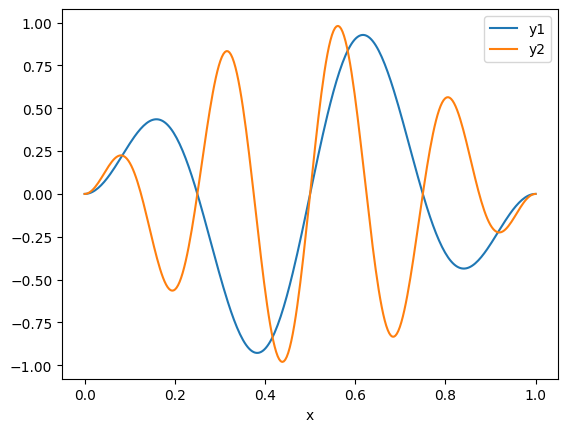

In [117]:
df.plot(x='x');

For higher resolution images, you can use `%config InlineBackend.figure_format = 'retina'`

Looking at the smaller ones might look blurry on high-res screens.

### pandas (with a splash of numpy - `.r_[]`)

#### CSV Stuff (read, info, etc.)

##### Read CSVs

In [118]:
import pandas as pd
csvPath = './datasets/uci-breast-cancer/cancer_data.csv'
data = pd.read_csv(csvPath)  # transform csv into pandas DataFrame

data.head()  # show first 5 rows

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [119]:
# print col labels
for i, label in enumerate(data.columns):
    print(i, label)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_se
13 texture_se
14 perimeter_se
15 area_se
16 smoothness_se
17 compactness_se
18 concavity_se
19 concave points_se
20 symmetry_se
21 fractal_dimension_se
22 radius_worst
23 texture_worst
24 perimeter_worst
25 area_worst
26 smoothness_worst
27 compactness_worst
28 concavity_worst
29 concave points_worst
30 symmetry_worst
31 fractal_dimension_worst
32 Unnamed: 32


In [120]:
'''
Params:
- filepath = c'mon
- sep = delimiter
- header = row to be used as header (0 by default)
- index_col = 1 or more columns to be the index of the dataframe
    - you can specify multiple by doing index_col=['Name', 'ID']
    - can also do ints for the index of the... thing you want to index with
- names = list of labels for each col
    - replace header line by using the header override, .e.g. f=pd.read_csv(..., header=0, names=list1)
'''

try: 
    pd.read_csv(filepath=csvPath, sep=",", header=0, index_col="this", names=["this", "that", "other"])
except:
    print("This does nothing")

This does nothing


Some more examples:

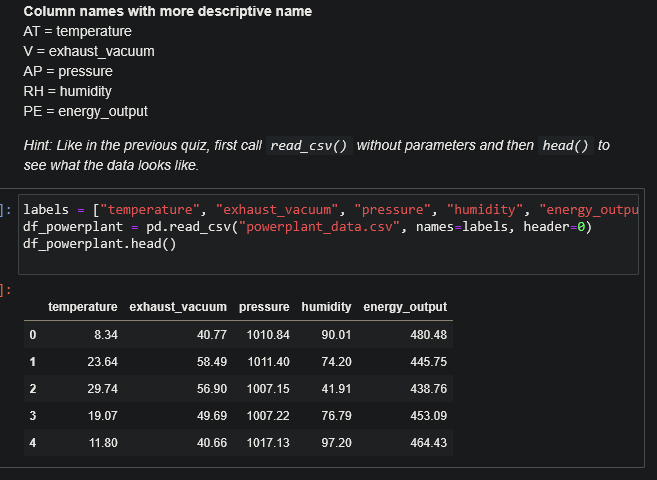

##### Write CSVs

In [121]:
firstFive = (pd.read_csv('./datasets/uci-breast-cancer/cancer_data.csv', index_col=0)).head()

outputPath = "./datasets/uci-breast-cancer/first_five.csv"
print("Writing to", outputPath)
firstFive.to_csv(outputPath, index=False)  # will ignore the index

secondFive = (pd.read_csv(outputPath, index_col=0)).head()

Writing to ./datasets/uci-breast-cancer/first_five.csv


#### Useful DataFrame Attribs/Methods

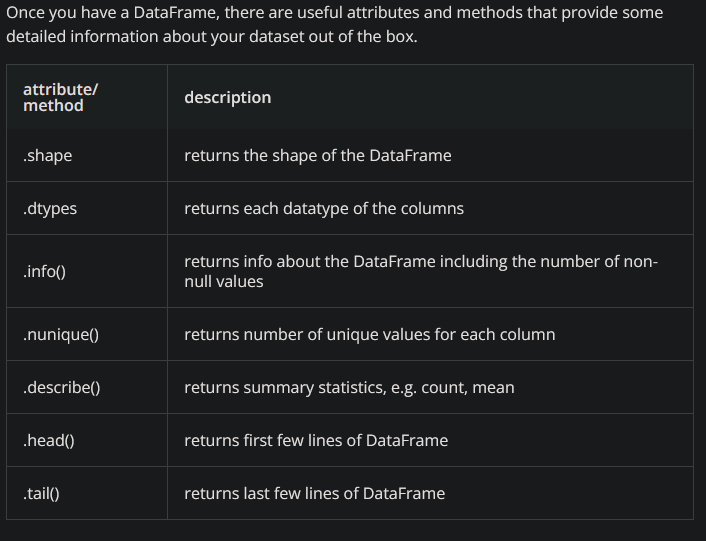

In [122]:
import pandas as pd

df = pd.read_csv('./datasets/uci-breast-cancer/cancer_data.csv')

In [123]:
df.shape  # tuple of the (rows, cols)

(569, 33)

In [124]:
df.dtypes  # datatype for each col

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [125]:
type(df['diagnosis'][0])  # returns a string, but the above shows as type "object"
# this is because pandas is storing a pointer to the string in the dataframe


str

In [126]:
df.info()  # summary of dataframe (number of entries, cols, each col label, datatypes, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [127]:
df.nunique()  # number of unique datatypes per col

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [128]:
df['diagnosis'].unique()  # list of unique values for a given column

array(['M', 'B'], dtype=object)

In [129]:
df['diagnosis'].value_counts()  # wow, this is super helpful
# returns the count of each value in a column

diagnosis
B    357
M    212
Name: count, dtype: int64

In [130]:
df.tail(2)  # return the last two - also works with head and any int 

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
567          0.11780           0.27700          0.3514                0.152   
568          0.05263           0.04362          0.0000                0.000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
567            0.86810           0.9387                 0.265          0.4087   
568            0.06444           0.0000                 0.000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
567                  0.12400          NaN  
568                  0.07039          NaN  

[2 rows x 33 columns]

#### Indexing and Selecting Data

In [131]:
# print all column labels w/ index
for i, col in enumerate(df.columns):
    print(i, col)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_se
13 texture_se
14 perimeter_se
15 area_se
16 smoothness_se
17 compactness_se
18 concavity_se
19 concave points_se
20 symmetry_se
21 fractal_dimension_se
22 radius_worst
23 texture_worst
24 perimeter_worst
25 area_worst
26 smoothness_worst
27 compactness_worst
28 concavity_worst
29 concave points_worst
30 symmetry_worst
31 fractal_dimension_worst
32 Unnamed: 32


##### Selecting Data (`loc`, `iloc`, `Numpy.r_[]`)

`loc` uses labels of rows/cols while `iloc` uses index numbers. This is akin to how Python lets you select subsets of lists

In [132]:
df_means = df.loc[:,'id':'fractal_dimension_mean']  # select everything from ID to fractal_dimension_mean
df_means.head(1)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871

In [133]:
df_means = df.iloc[:,:12]
df_means.head(1)

# save for future use
df_means.to_csv('./datasets/uci-breast-cancer/cancer_data_means.csv', index=False)

Multiple ranges can be selected using `Numpy.r_[]`, which "translates slice objects to contactenation along the first axis."

Example:

In [134]:
np.r_[:2, 4:6]  # 0-2 exclusive, then 4-6 exclusive

array([0, 1, 4, 5])

This resulting array can be treated as an array of indexes, which can then be passed to `iloc` to select and store that data!

In [135]:
df_stderr = df.iloc[:, np.r_[0:2, 12:22]]  # now isn't that something!
df_stderr.head(1)

id diagnosis  radius_se  texture_se  perimeter_se  area_se  \
0  842302         M      1.095      0.9053         8.589    153.4   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   

   symmetry_se  fractal_dimension_se  
0      0.03003              0.006193

#### Data Cleaning

Reasons to clean:
- Incorrect data types
- Missing Data
- Duplicates
- Structural issues (different col names, mismatched number of records)

##### Missing Data

How many null values are there (NaN, etc.). Find this with `.info()` 

Remedy this with
- Imputing with the mean - get the mean, then use `.fillna(mean)`

In [136]:
import pandas as pd

df = pd.read_csv('./datasets/cleaning/clean-me-baddata.csv') 

df.info()  # 7 rows, col2 has 2 null values, col3 has 1.
# Also, the data types are messed up, but that will be handled later


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    7 non-null      int64  
 1   col2    5 non-null      float64
 2   col3    6 non-null      float64
 3   col4    7 non-null      int64  
 4   col5    7 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 408.0 bytes


`.isnull` can show you how many null values there are!

In [137]:
df.isnull().sum()  # aggregate with sum

col1    0
col2    2
col3    1
col4    0
col5    0
dtype: int64

In [138]:
df.isnull().sum().any()

np.True_

In [139]:
mean = df['col2'].mean()
df['col2'] = df['col2'].fillna(int(mean))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    7 non-null      int64  
 1   col2    7 non-null      float64
 2   col3    6 non-null      float64
 3   col4    7 non-null      int64  
 4   col5    7 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 408.0 bytes


Use `.dropna` to get rid of null values

##### Duplicates

In [140]:
df.duplicated()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
dtype: bool

In [141]:
df.duplicated().sum()

np.int64(2)

In [142]:
df.duplicated().any()

np.True_

In [143]:
(df.drop_duplicates()).info()  # drops 2 entries

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      int64  
 1   col2    5 non-null      float64
 2   col3    4 non-null      float64
 3   col4    5 non-null      int64  
 4   col5    5 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 240.0 bytes


In [144]:
tmp = df.copy()  # doing this to not break the df DataFrame
tmp.drop_duplicates(inplace=True)  # this will remove the duplicates in the dataframe

tmp.info()
del tmp

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      int64  
 1   col2    5 non-null      float64
 2   col3    4 non-null      float64
 3   col4    5 non-null      int64  
 4   col5    5 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 240.0 bytes


##### Incorrect Data Types/Casting

In [145]:
# Ex: convert string to timestamp - you'll have to do this when you read in from a CSV
# unless you use parse_dates or whatever

# df['date'] = df['date'].to_datetime()

You can use the `.astype()` method to cast to a new datatype

In [146]:
try:
    # dictionary mapping
    df['id'] = df.astype({'id': 'int32'})

    # series
    df['id'] = df['id'].astype('int32')
except:
    print("Pretend that worked")

Pretend that worked


Check that:
- Datetimes are not strings

##### Example: Basic Data Cleaning (`cancer_data_means.csv`)

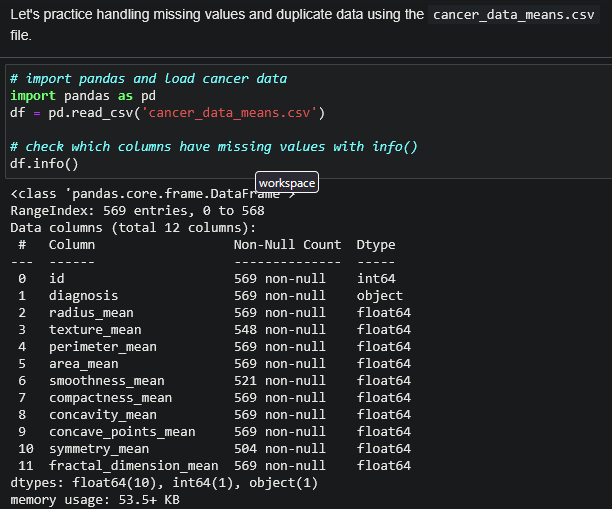

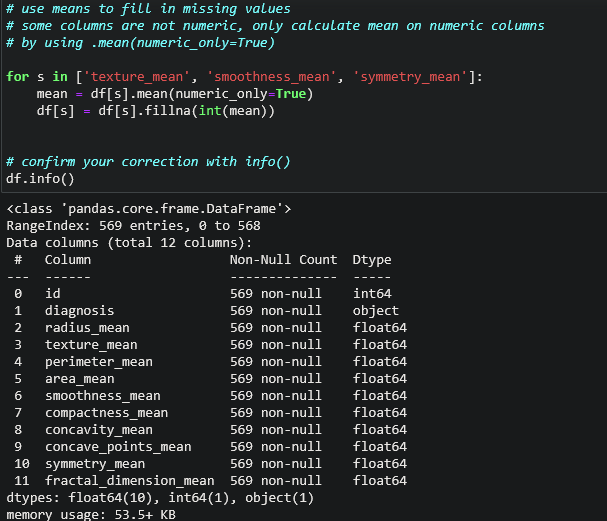

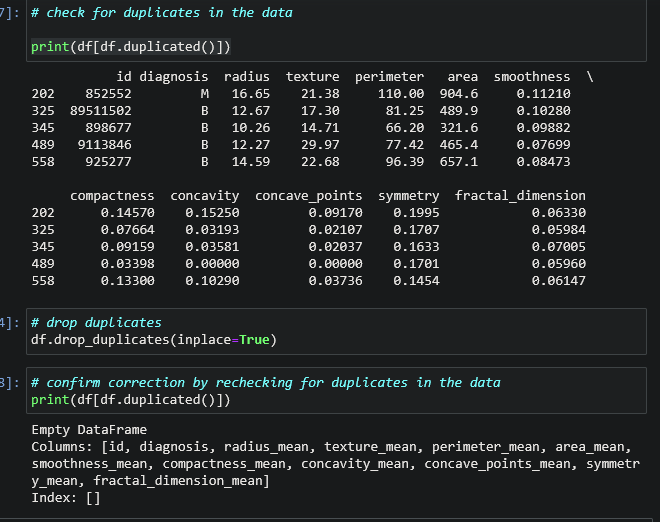

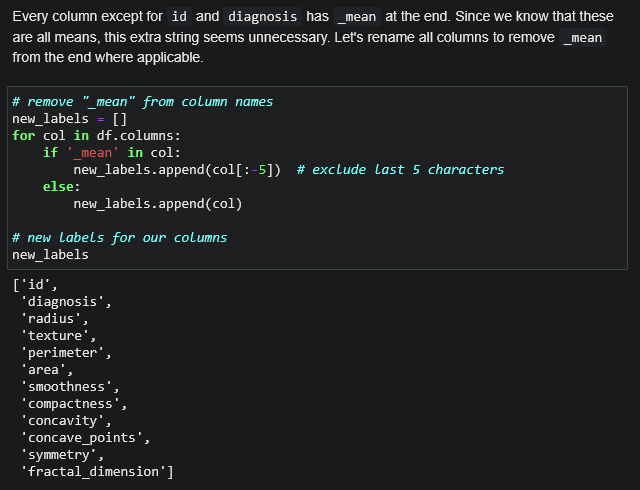

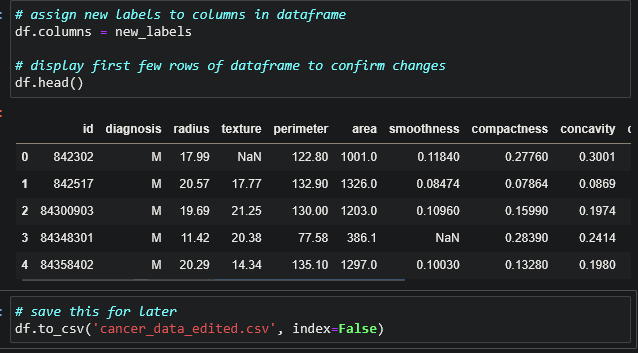

#### Modifying/Querying DataFrames

Useful for when you are trying to merge datasets that either have extraneous columns or ones with different names

##### Modifying Strings (regex, etc.)

[Documentation](https://pandas.pydata.org/docs/user_guide/text.html#string-methods)

Using `str` attribute's `extract` method allows you to use regex to pull out matches.

`extract` requires at least one capture group, i.e. `(pattern here)`.

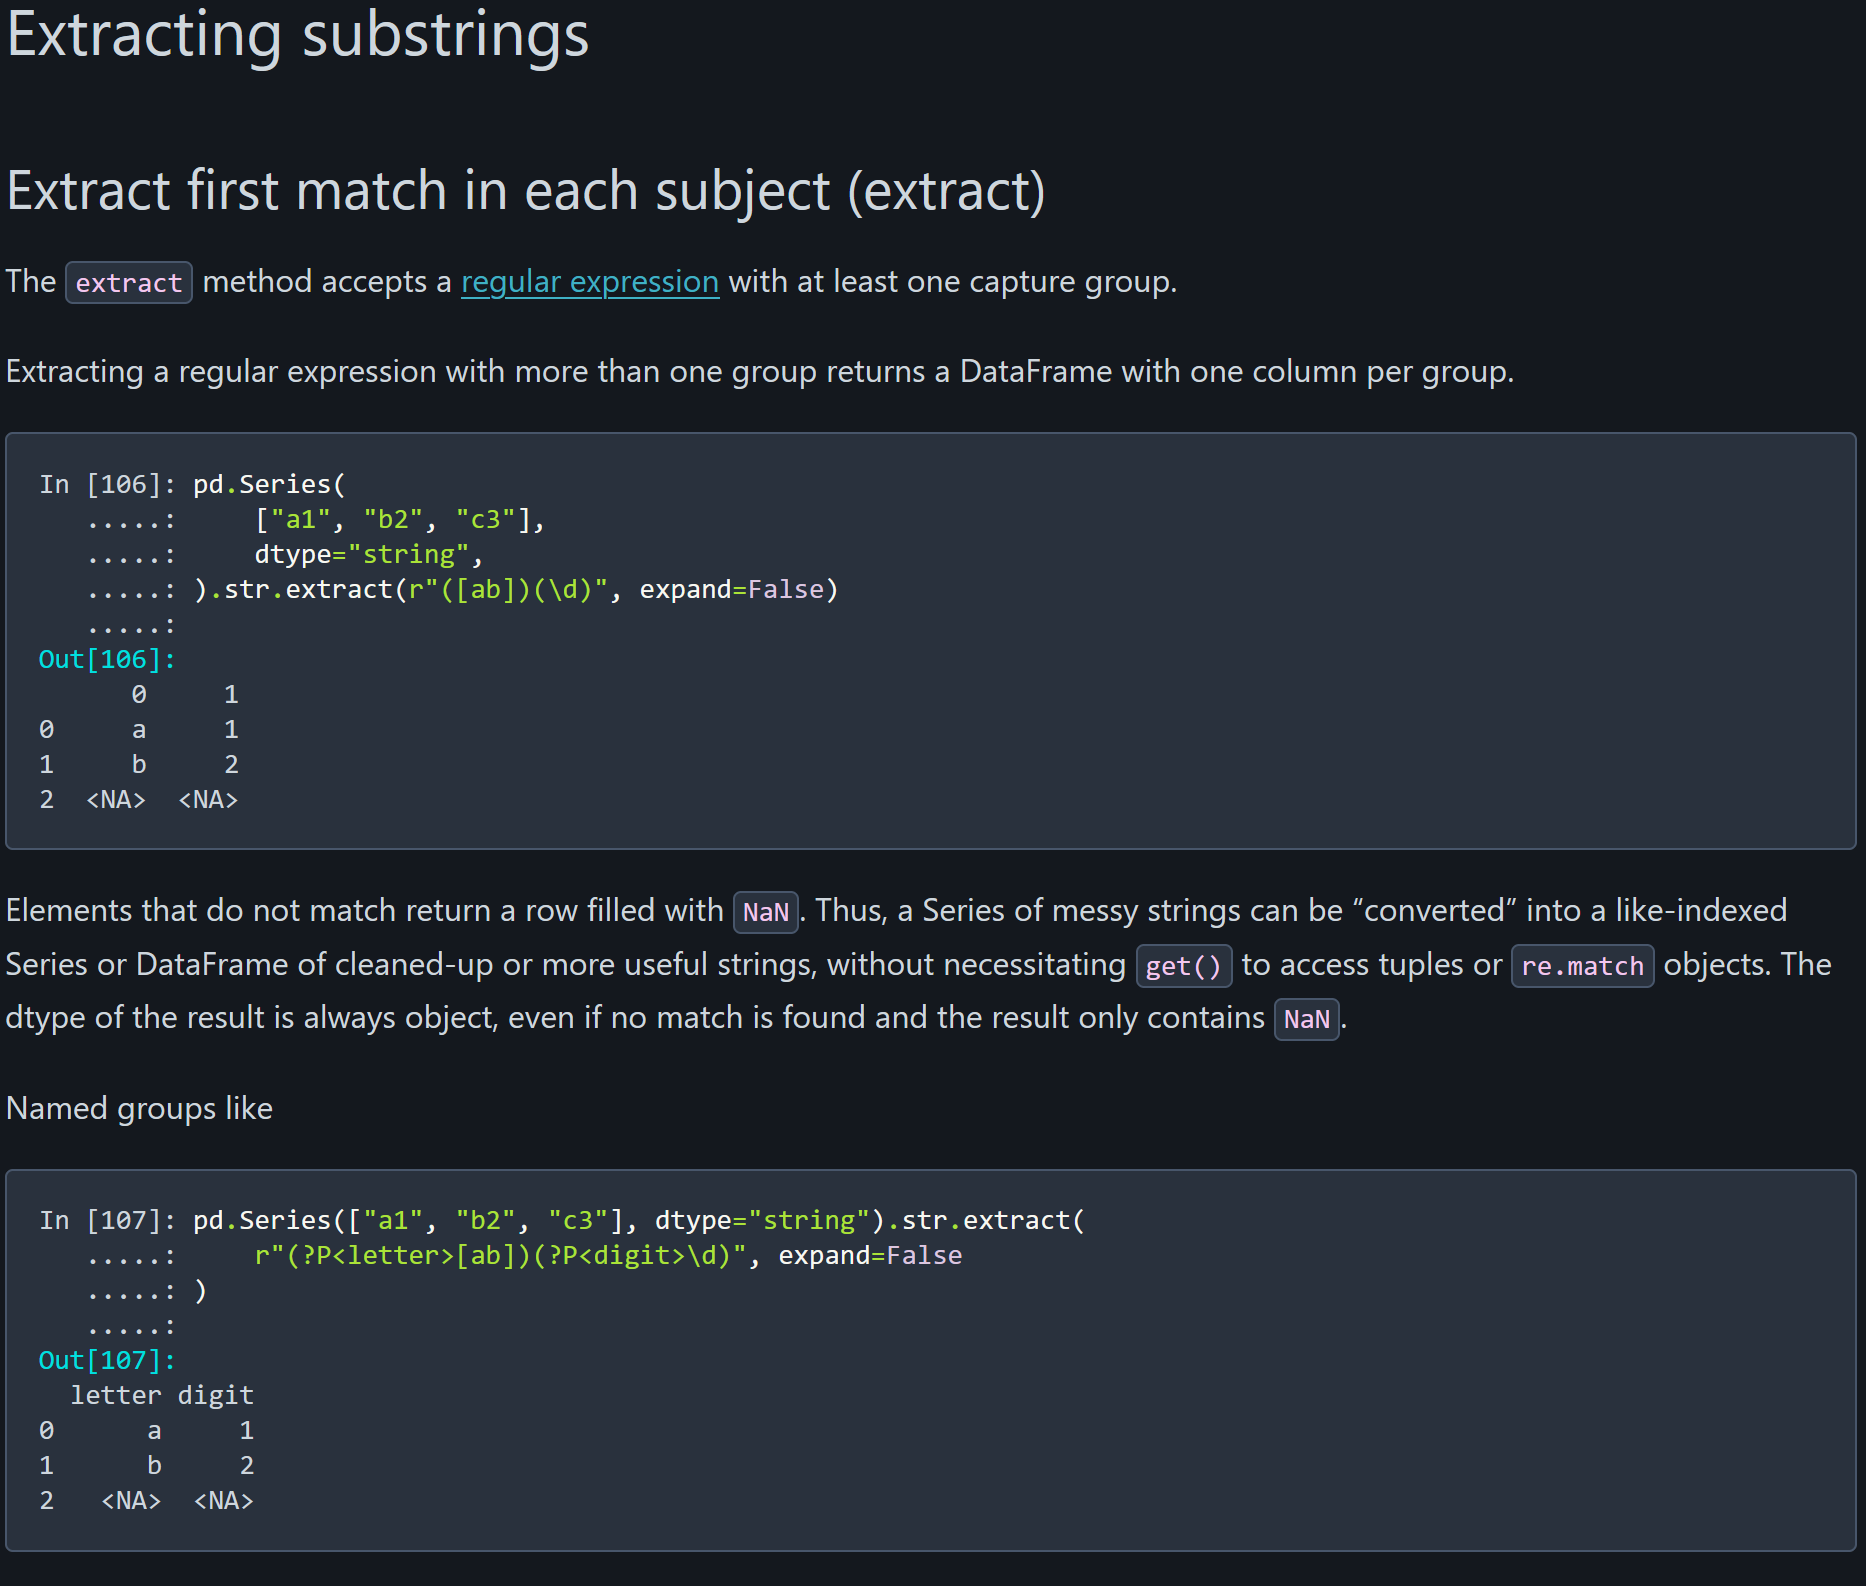

`str` is only an attribute of Indexes or Series', not entire DataFrames. To be able to access the `str` attrib, you need to "expose it" by accessing a column

In [197]:
df = pd.read_csv('./datasets/cleaning/clean-me-badtypes.csv')

ints = df['col3'].str.extract('(\d+)').astype(int)

print(ints.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7 non-null      int64
dtypes: int64(1)
memory usage: 184.0 bytes
None


##### Dropping

Drop what's not consistent or relevant

In [147]:
try:
    df.drop(['example-label1', 'example-label2'], axis=1, inplace=True)  # it's that simple
    # axis - 0=index 1=columns
    # inplace - default False - return a copy, otherwise do operation in place and return None

    df.head(1)  # check it real quick
except:
    print("yeah, it doesn't work for multiple reasons")

yeah, it doesn't work for multiple reasons


Dropping missing values/Null - `.dropna()`

In [148]:
(df.dropna()).head()  # col 32 has all null for all rows, so all rows dropped

col1  col2  col3  col4  col5
0     1   2.0   3.0     4     5
1     5   4.0   3.0     2     1
2     1   3.0   1.0     1     1
3     1   3.0   1.0     1     1
4     5   4.0   4.0     2     1

##### Renaming

Use `.rename`

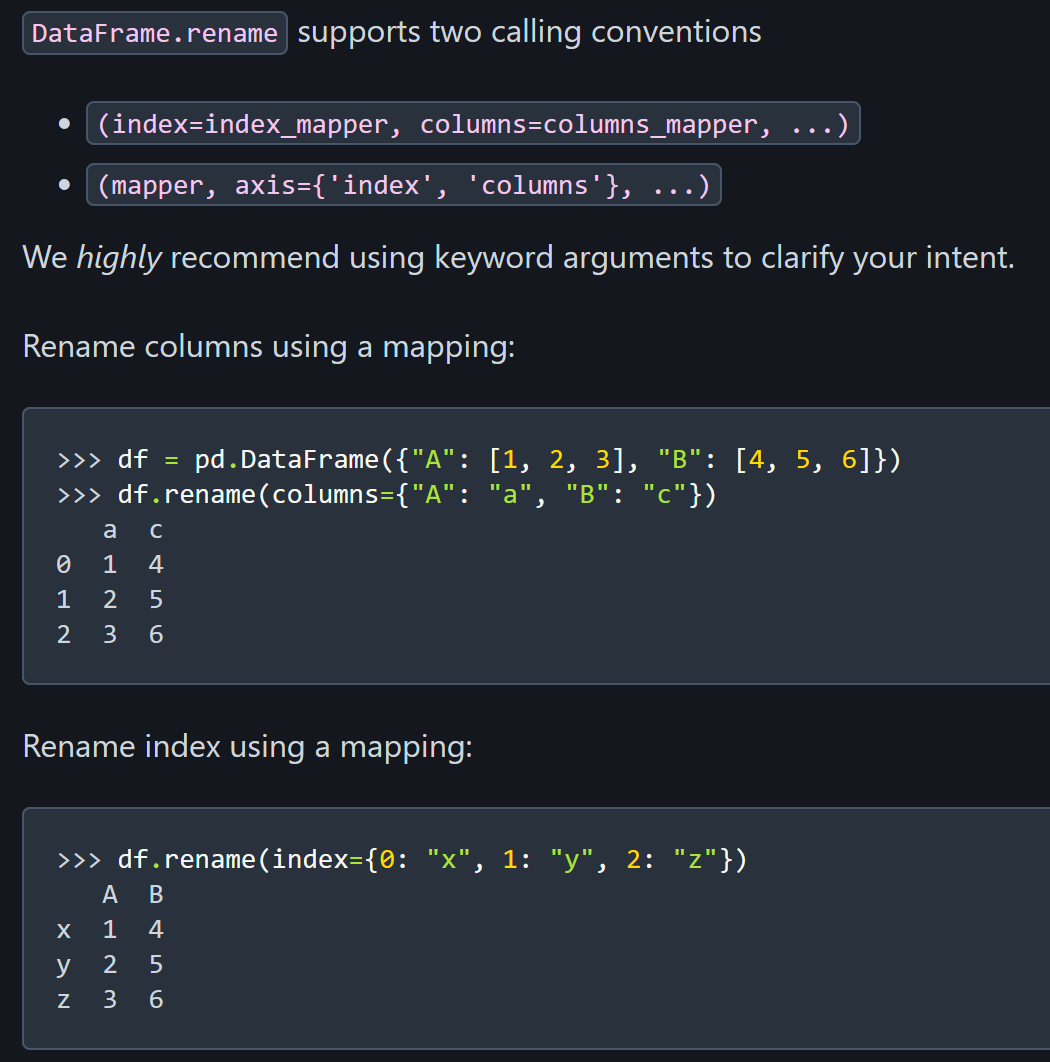

In [149]:
try:
    df.rename(columns={'current_name': 'new_name', 'other': 'new_other'}, inplace=True)

    # Using lambdas - convert to snake case
    df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
except:
    print("Yea")

If you are doing this for joins/merging, you can also do a quick check that the columns are all the same

In [150]:
df_2 = df.copy()
(df.columns == df_2.columns).all()

np.True_

#### `pandas` Query

You can do something like `df[df[...]...]` to select rows by "indexing with a mask" or you can use the `.query()` method.

In [151]:
import pandas as pd
df = pd.read_csv('./datasets/uci-breast-cancer/first_five.csv')

df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
3          0.6638                  0.17300          NaN  
4          0.2364                  0.07678          NaN  

[5 rows x 32 columns]

In [152]:

df_cw = df[df['concavity_worst'] > 0.5]
df_cw

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
3         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   
3           0.1425            0.2839          0.2414               0.1052   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
3         0.2597  ...          26.50            98.87       567.7   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
3            0.2098             0.8663           0.6869                0.2575   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                   0.1189          NaN  
3          0.6638                   0.1730          NaN  

[2 rows x 32 columns]

In [153]:
df.query('radius_mean > 18')

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1         M        20.57         17.77           132.9     1326.0   
2         M        19.69         21.25           130.0     1203.0   
4         M        20.29         14.34           135.1     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
1         0.1812  ...          23.41            158.8      1956.0   
2         0.2069  ...          25.53            152.5      1709.0   
4         0.1809  ...          16.67            152.2      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
4          0.2364                  0.07678          NaN  

[3 rows x 32 columns]

In [154]:
df.query('diagnosis == "M"')

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
3          0.6638                  0.17300          NaN  
4          0.2364                  0.07678          NaN  

[5 rows x 32 columns]

#### Data Type Optimization

In [223]:
df = pd.read_csv('./datasets/uci-breast-cancer/cancer_data.csv')

print((df.nunique() < 5).any())  # Do any columns have less than 5 unique values?

True


In [224]:
df.info()  # pay attention to memory usage at the bottom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Do you need to be using float64 for all floats? Or int64 for all ints? What about strings for all strings, especially `diagnosis`?

In [ ]:
df.diagnosis.value_counts()  # two different values

diagnosis
B    357
M    212
Name: count, dtype: int64

A more efficient datatype to use for `diagnosis` would be `category` instead of `string`.

In [225]:
df.diagnosis = df.diagnosis.astype('category')
df.id = df.id.astype('int16')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int16   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

And now it's using slightly less memory. With more diligent application of optimization, we can probably get this down to less than a quarter of that.

#### Concatentation (union)

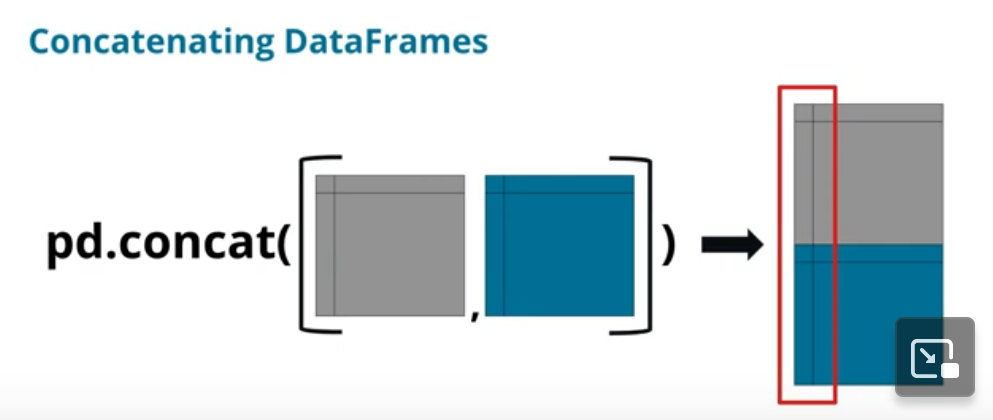

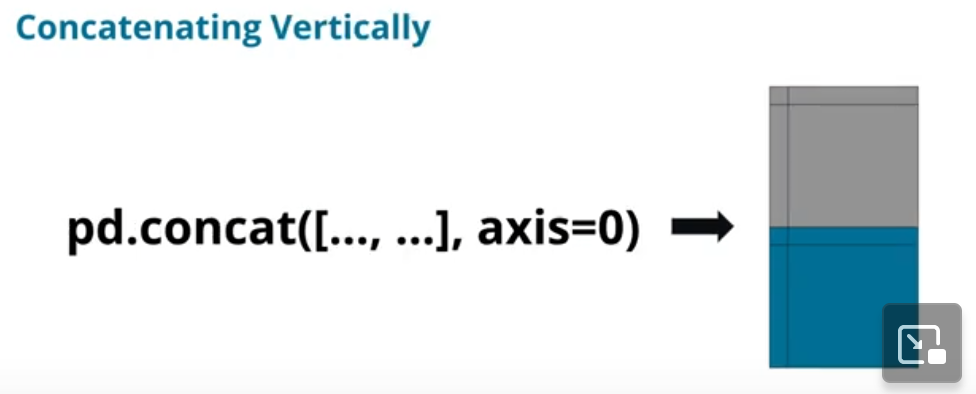

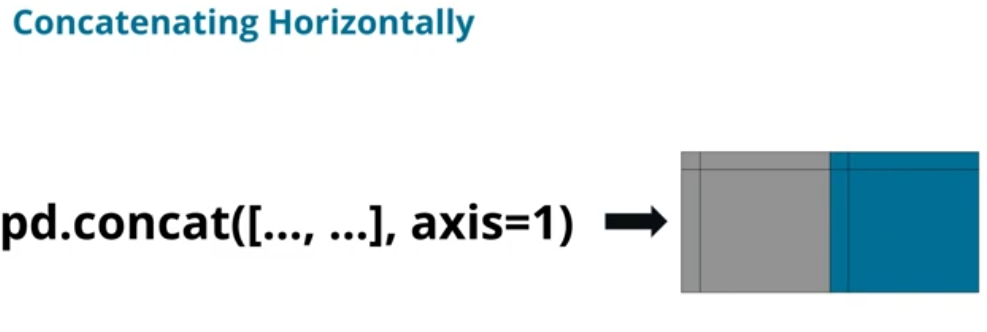



Using the `.concat` method, multiple DataFrames can be combined into one

One useful feature that can help you set these disparate DFs apart/maintain some sort of difference is by "broadcasting," which will set a given value to all rows in a column. You can even do this with a new column name. 

Lets say we have a couple of years worth of cancer data across a few CSVs. With `pandas` we can do something like

```python
df_01 = pd.read_csv('2001-data.csv')
df_11 = pd.read_csv('2011-data.csv')

# broadcast year to all rows in applicable DF
df_01['year'] = '2001'
df_11['year'] = '2011'

df_01.head(2)  # would output a table including the new col/val

# now combining them into one DF, checking output then writing it back out to a file
df = pd.concat([df_01, df_11], axis=0)

df.head(1)  # 2001 result
df.tail(1)  # 2011 result

df.to_csv('01_11_concat.csv)', index=False)

```

#### Joins/Merging

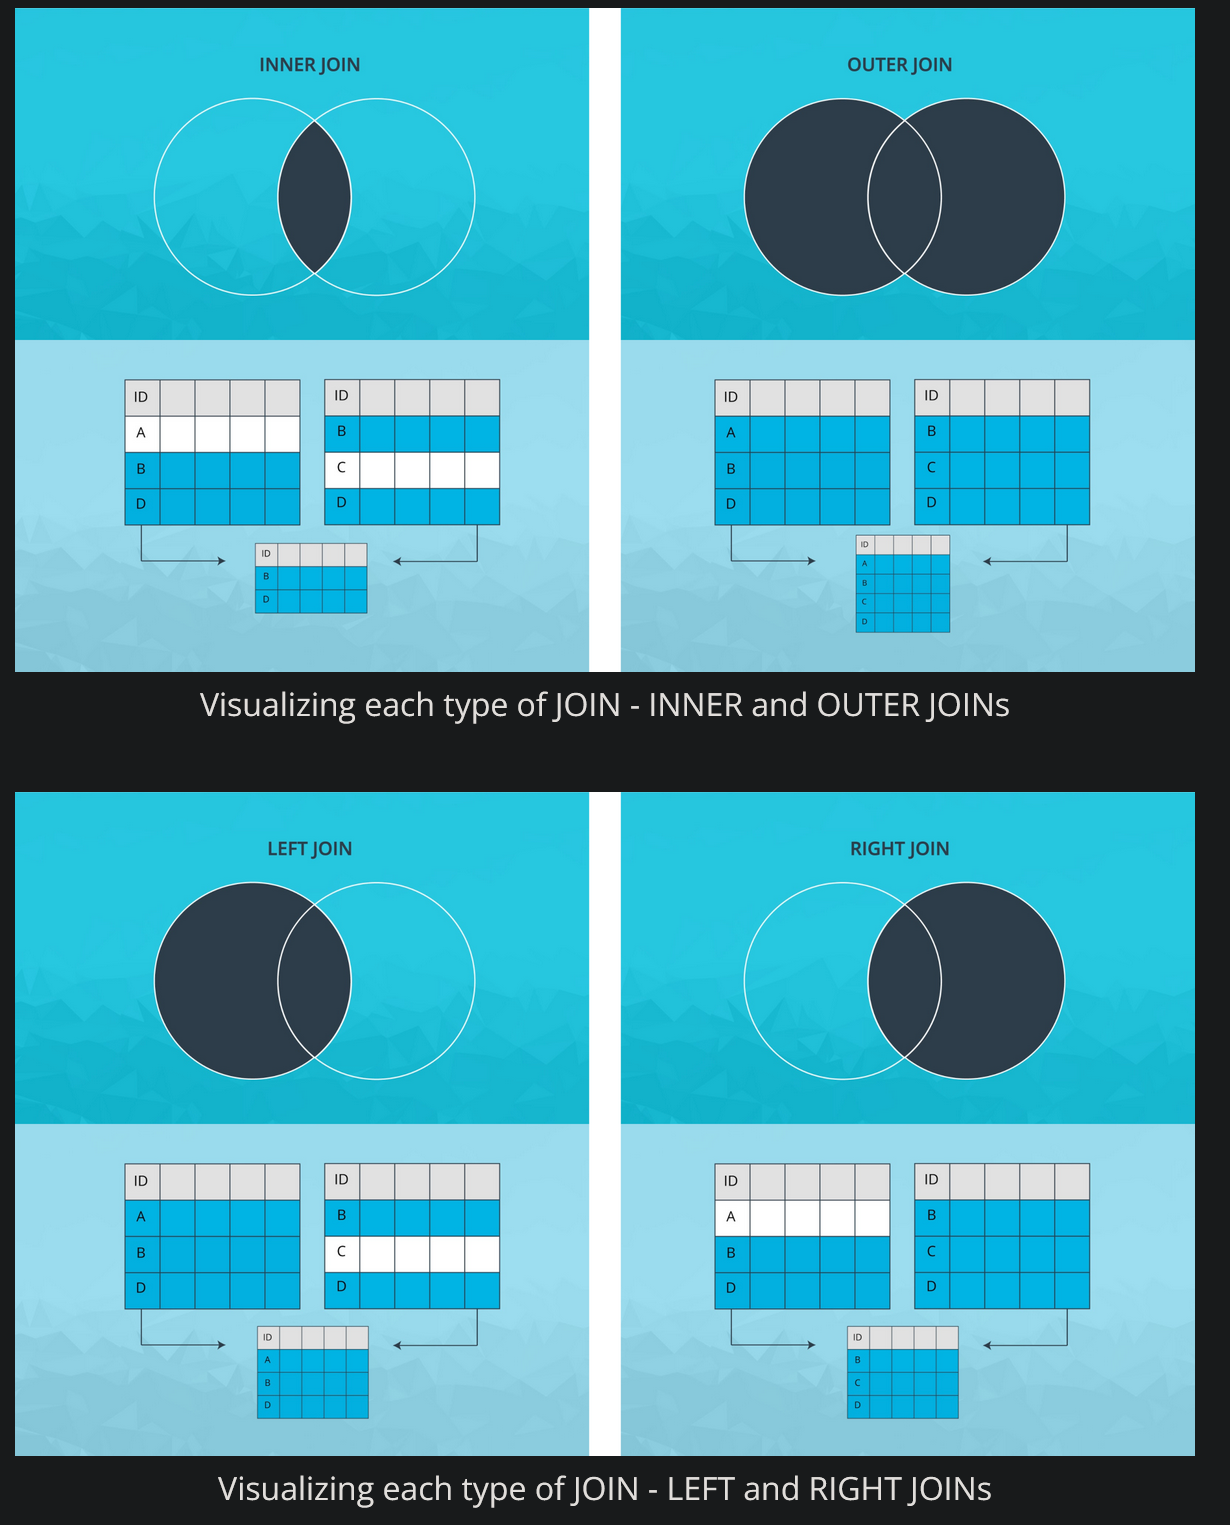

Syntax:

```python
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
```

Example:

In [ ]:
try: 
    # rename 2008 columns
    x = df_08.columns
    
    df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)
    
    # view to check names
    df_08.head()
    
    # merge datasets
    df_combined = pd.merge(df_08, df_18, left_on='model_2008', right_on='model')
    
    # view to check merge
    df_combined.head()
except:
    print("yeah, I don't feel like actually importing more data for these.")

#### Explode

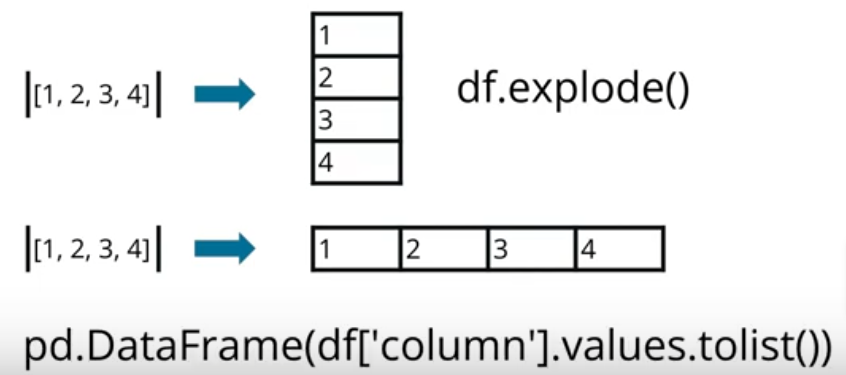

Converts nested list into a value in a row. It will return a DataFrame that with multiple items for each index, each list item getting its own row. Example: 

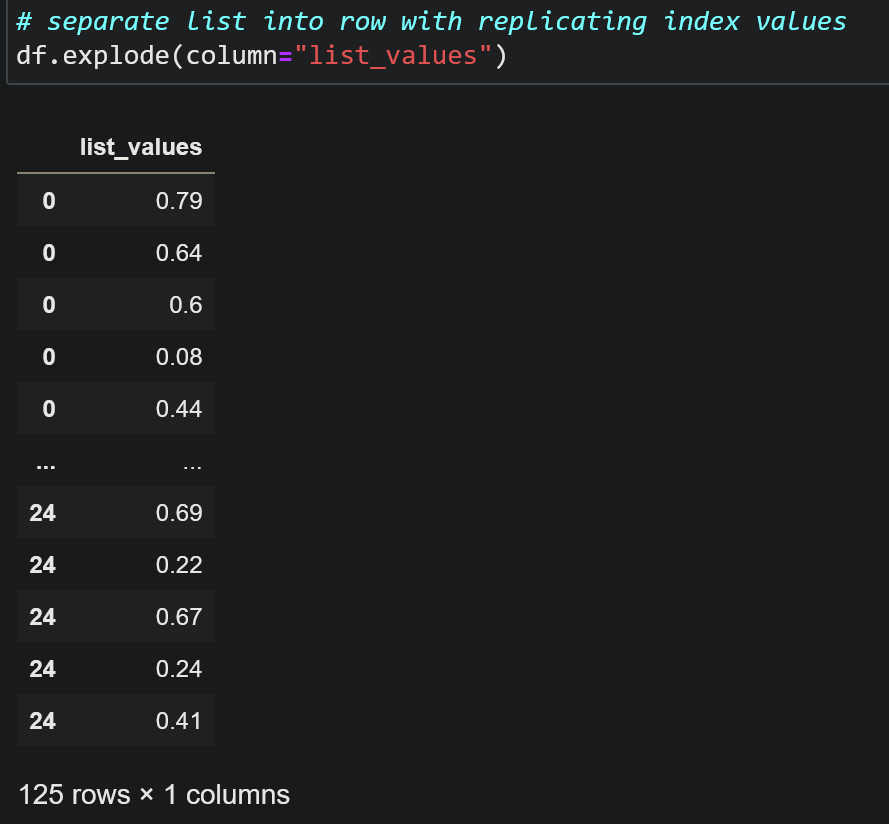

Doing `pd.DataFrame(df['column'].values.tolist())` will output the list "exploded" into columns. The top will be the list index, the left will be the index of the entire list. Example:

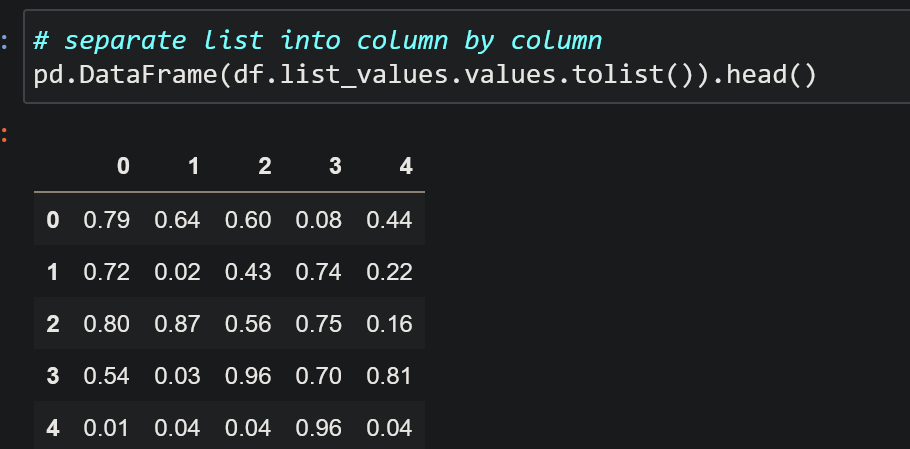

## Exercises

### 4.9 Filter, Drop Nulls, Dedupe

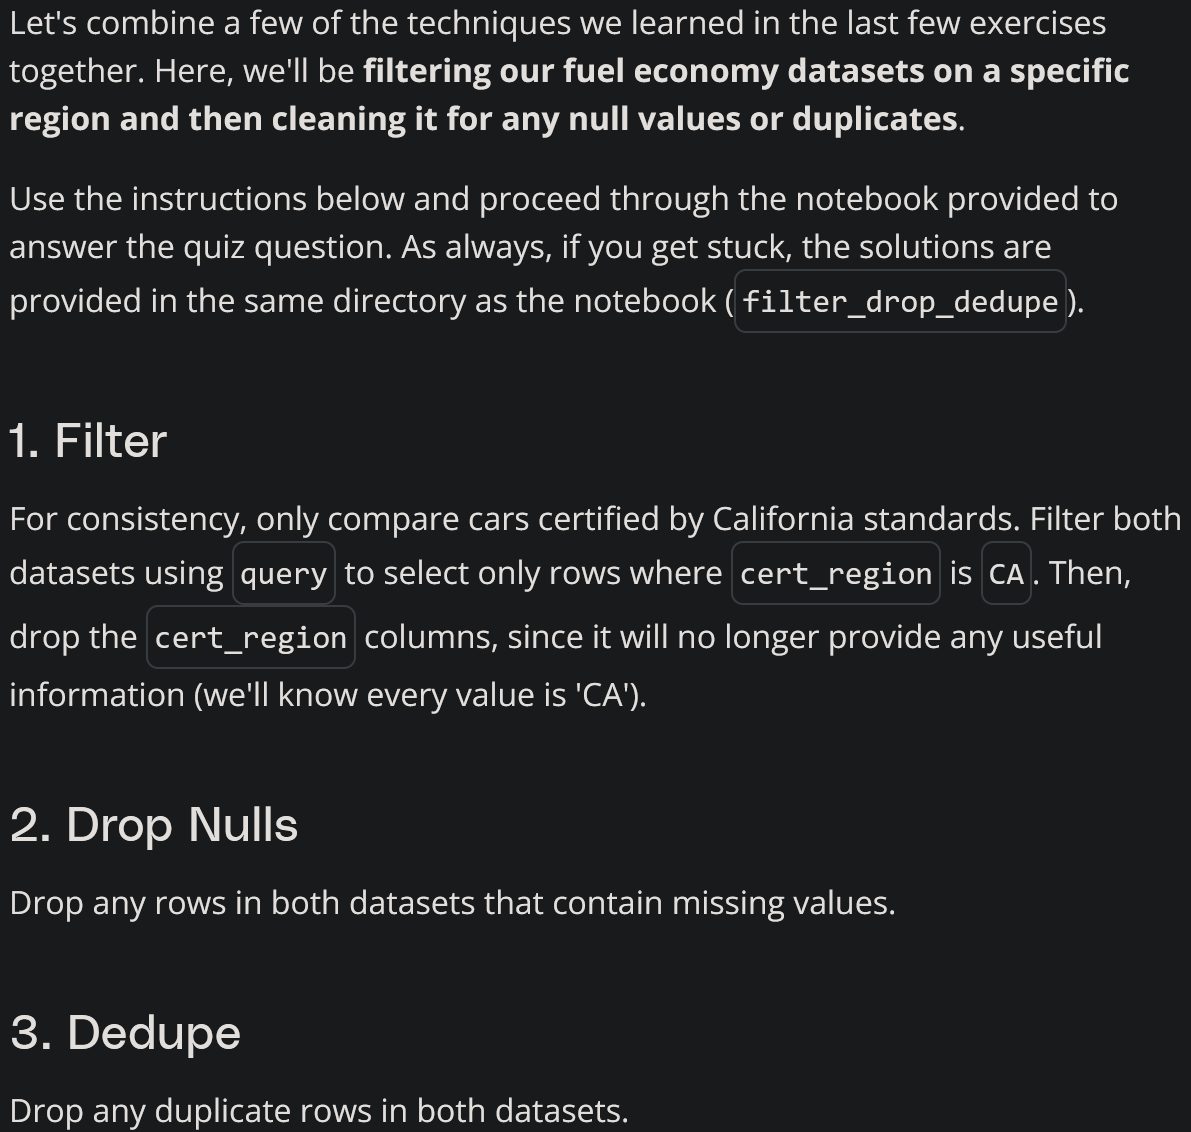

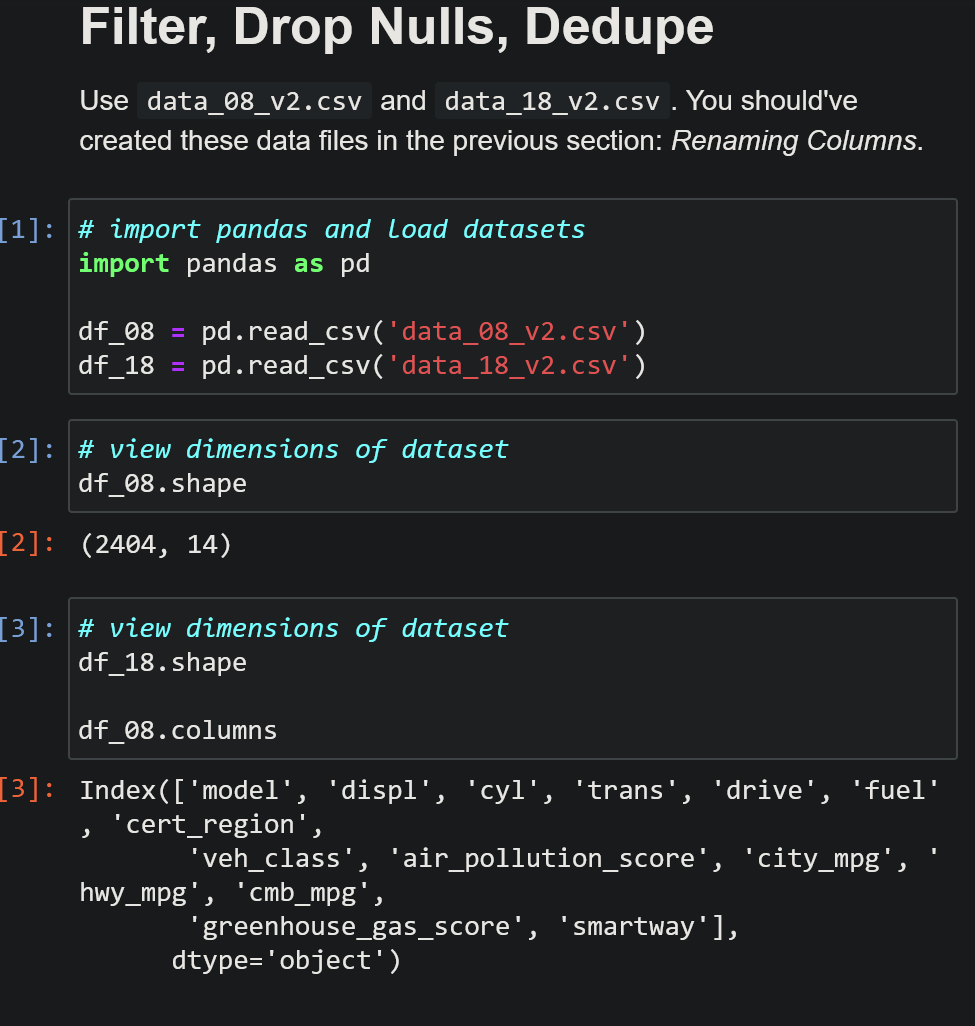

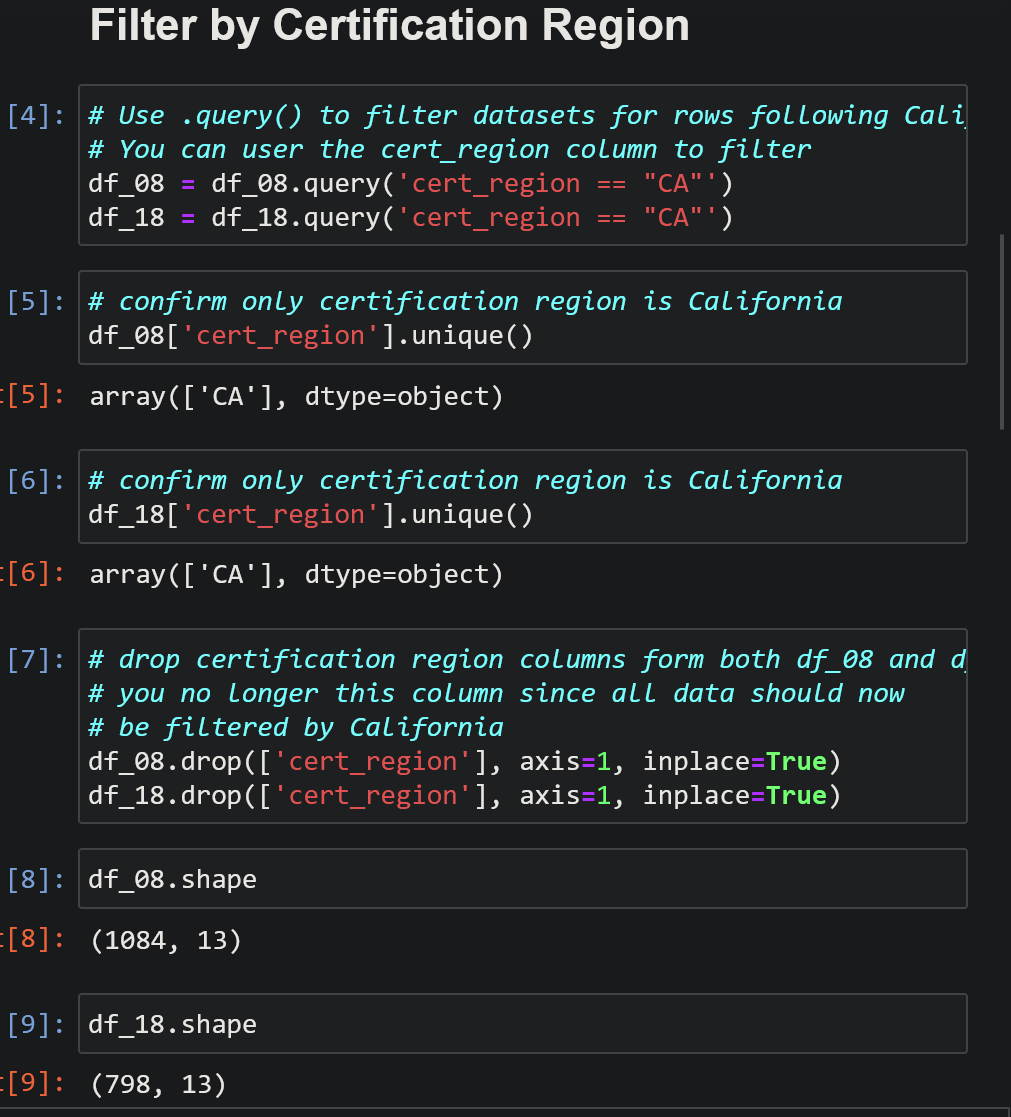

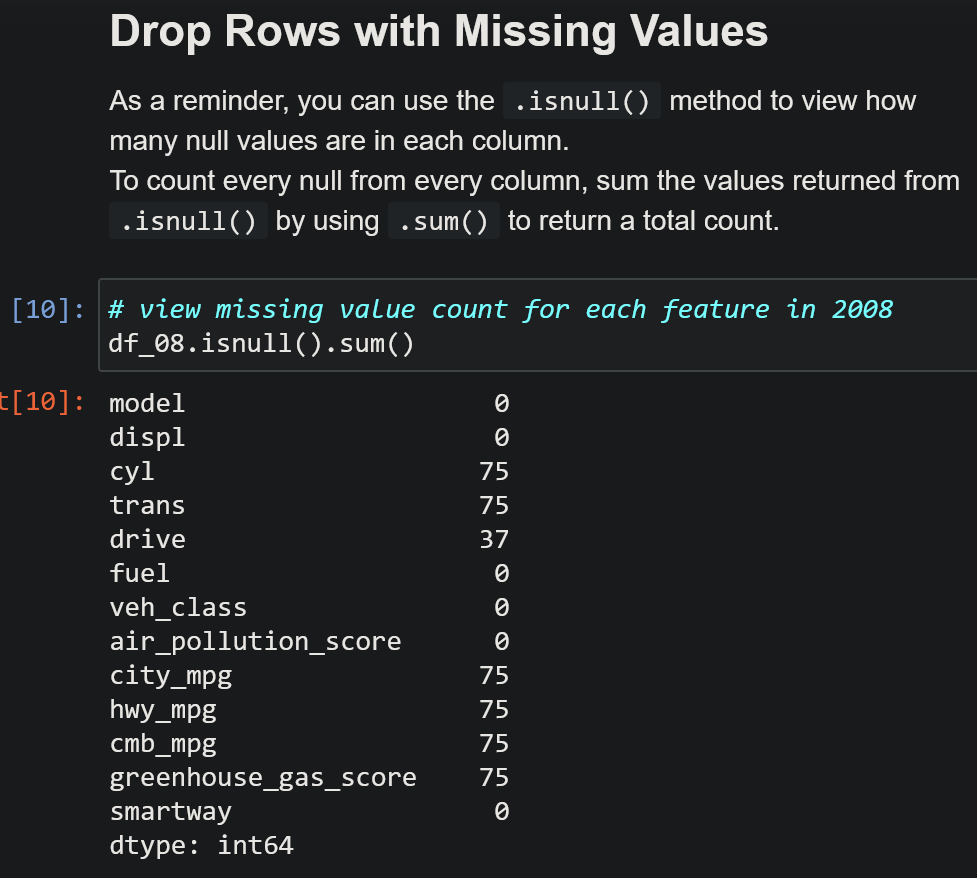

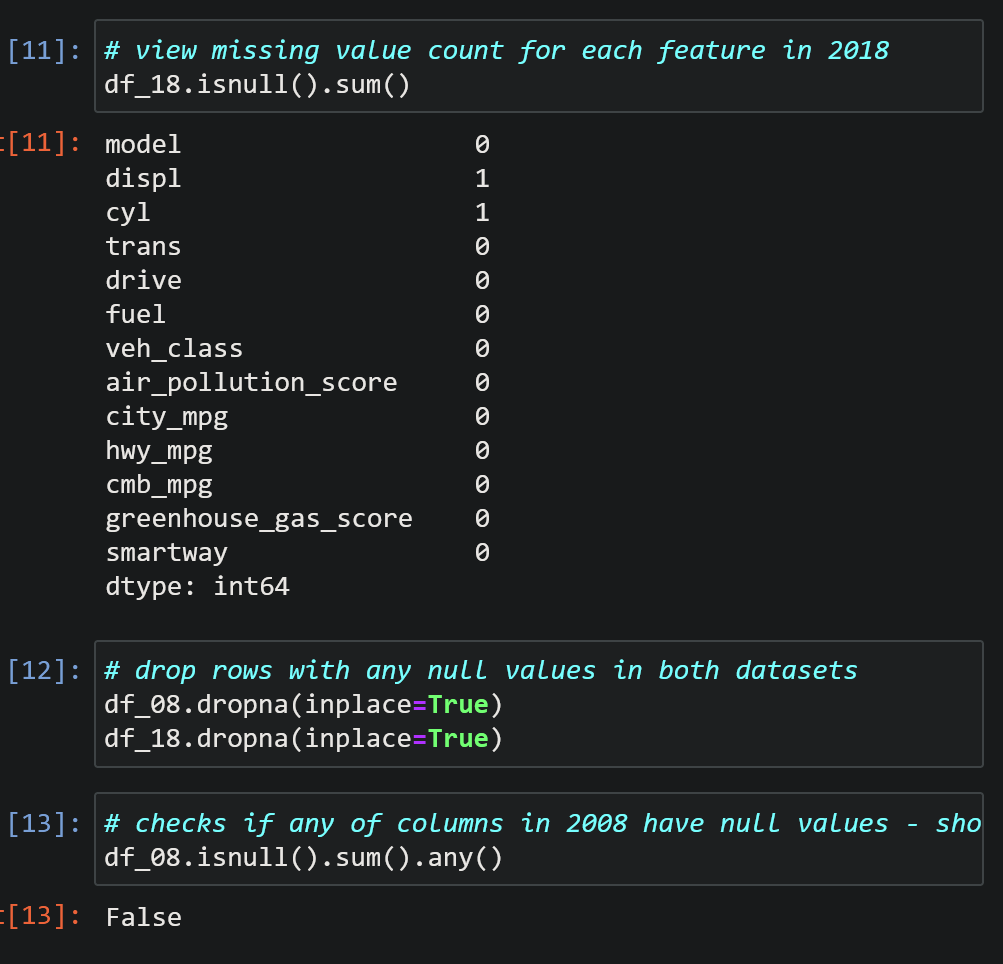

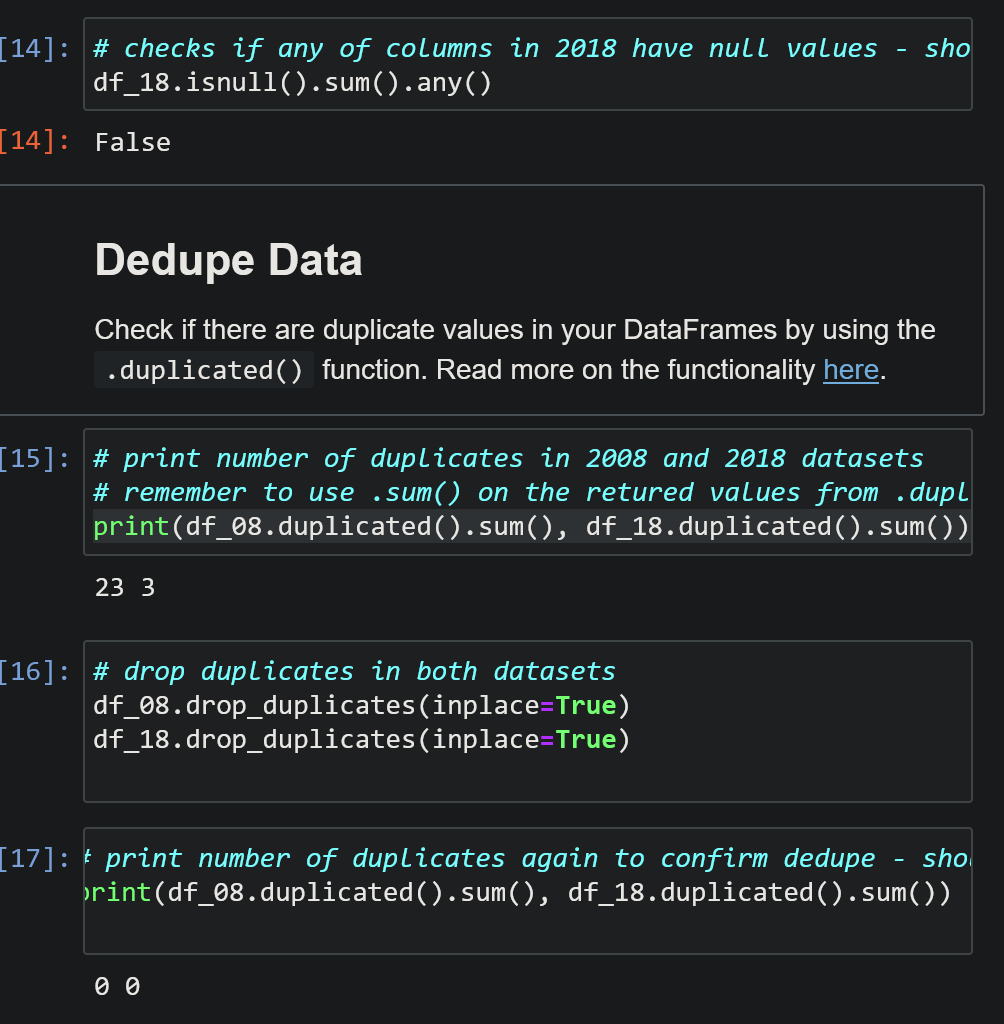

### 4.11 Fixing Data Types

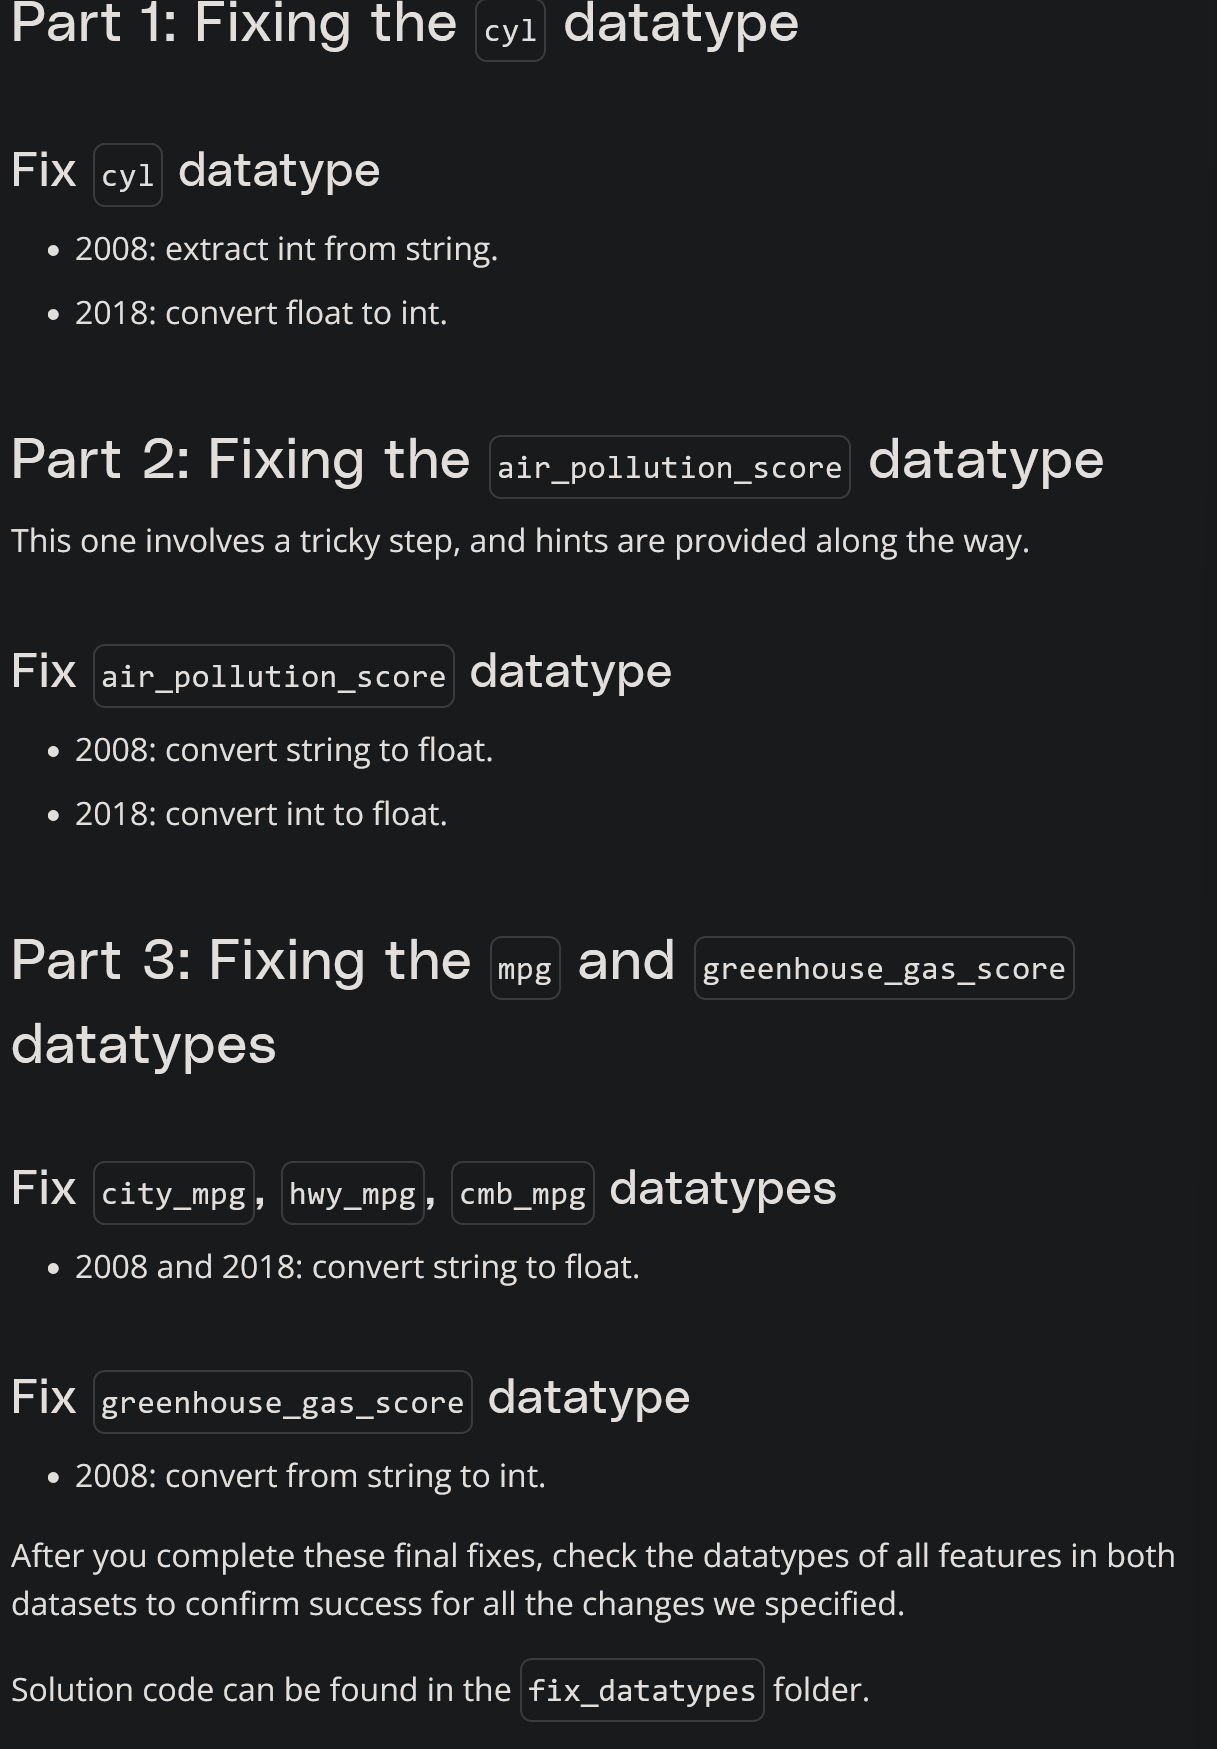


#### Fix Datatypes

##### Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

Load datasets `data_08_v3.csv` and `data_18_v3.csv`. You should've created these data files in the previous section: *Filter, Drop Nulls, Dedupe*.


```python
# load datasets
import pandas as pd

df_08 = pd.read_csv('data_08_v3.csv')
df_18 = pd.read_csv('data_18_v3.csv')
```


```python
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()
```




    (6 cyl)     409
    (4 cyl)     283
    (8 cyl)     199
    (5 cyl)      48
    (12 cyl)     30
    (10 cyl)     14
    (2 cyl)       2
    (16 cyl)      1
    Name: cyl, dtype: int64



###### String Processing

We need to extract the number from the string. There are several ways to do it, but one example is using regex.  

Regex, or [regular expressions](https://docs.python.org/3/library/re.html) is a set of matching operations you can perform on strings. `(\d+)` is a pattern that matches any unicode decimal digit.  

For pandas, you can perform string operations by using the `str` attribute on a column with an object type. This is extremely powerful to manipulate strings in pandas. Review the [documentation](https://pandas.pydata.org/docs/user_guide/text.html#string-methods) for an in depth explanation.

For our use case, the `str` attribute has a method called [extract](https://pandas.pydata.org/docs/user_guide/text.html#extracting-substrings) which allows you to use regex to extract the numbers we are looking for. Combine this with the [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) method to convert the extracted number to a string.

You can read more of this process by reviewing this [Stack Overflow](https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas) thread.


```python
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract("(\d+)").astype(int)
```


```python
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()
```




    6     409
    4     283
    8     199
    5      48
    12     30
    10     14
    2       2
    16      1
    Name: cyl, dtype: int64




```python
# convert 2018 cyl column from a float type to int type
df_18['cyl'] = df_18['cyl'].astype(int)

df_18['cyl'].value_counts()
```




    4     365
    6     246
    8     153
    3      18
    12      9
    5       2
    16      1
    Name: cyl, dtype: int64



##### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float


```python
# try using pandas' astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
# df_08['air_pollution_score'].astype(float)
```

###### Figuring out the issue

Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.


```python
df_08[df_08.air_pollution_score == '6/4']
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>displ</th>
      <th>cyl</th>
      <th>trans</th>
      <th>drive</th>
      <th>fuel</th>
      <th>veh_class</th>
      <th>air_pollution_score</th>
      <th>city_mpg</th>
      <th>hwy_mpg</th>
      <th>cmb_mpg</th>
      <th>greenhouse_gas_score</th>
      <th>smartway</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>582</th>
      <td>MERCEDES-BENZ C300</td>
      <td>3.0</td>
      <td>6</td>
      <td>Auto-L7</td>
      <td>2WD</td>
      <td>ethanol/gas</td>
      <td>small car</td>
      <td>6/4</td>
      <td>13/18</td>
      <td>19/25</td>
      <td>15/21</td>
      <td>7/6</td>
      <td>no</td>
    </tr>
  </tbody>
</table>
</div>



###### It's not just the air pollution score!

The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh... so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.


```python
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08.shape
```




    (1, 13)



Looks like this dataset only has one! The 2018 has MANY more - but don't worry - the steps I'm taking here will work for that as well!


```python
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.shape
```




    (38, 13)



We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!


```python
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>displ</th>
      <th>cyl</th>
      <th>trans</th>
      <th>drive</th>
      <th>fuel</th>
      <th>veh_class</th>
      <th>air_pollution_score</th>
      <th>city_mpg</th>
      <th>hwy_mpg</th>
      <th>cmb_mpg</th>
      <th>greenhouse_gas_score</th>
      <th>smartway</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>582</th>
      <td>MERCEDES-BENZ C300</td>
      <td>3.0</td>
      <td>6</td>
      <td>Auto-L7</td>
      <td>2WD</td>
      <td>ethanol/gas</td>
      <td>small car</td>
      <td>6/4</td>
      <td>13/18</td>
      <td>19/25</td>
      <td>15/21</td>
      <td>7/6</td>
      <td>no</td>
    </tr>
  </tbody>
</table>
</div>



For this next part, we're going use pandas' apply function. See the docs [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html).


```python
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
```


```python
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>displ</th>
      <th>cyl</th>
      <th>trans</th>
      <th>drive</th>
      <th>fuel</th>
      <th>veh_class</th>
      <th>air_pollution_score</th>
      <th>city_mpg</th>
      <th>hwy_mpg</th>
      <th>cmb_mpg</th>
      <th>greenhouse_gas_score</th>
      <th>smartway</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>582</th>
      <td>MERCEDES-BENZ C300</td>
      <td>3.0</td>
      <td>6</td>
      <td>Auto-L7</td>
      <td>2WD</td>
      <td>ethanol</td>
      <td>small car</td>
      <td>6</td>
      <td>13</td>
      <td>19</td>
      <td>15</td>
      <td>7</td>
      <td>no</td>
    </tr>
  </tbody>
</table>
</div>




```python
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>displ</th>
      <th>cyl</th>
      <th>trans</th>
      <th>drive</th>
      <th>fuel</th>
      <th>veh_class</th>
      <th>air_pollution_score</th>
      <th>city_mpg</th>
      <th>hwy_mpg</th>
      <th>cmb_mpg</th>
      <th>greenhouse_gas_score</th>
      <th>smartway</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>582</th>
      <td>MERCEDES-BENZ C300</td>
      <td>3.0</td>
      <td>6</td>
      <td>Auto-L7</td>
      <td>2WD</td>
      <td>gas</td>
      <td>small car</td>
      <td>4</td>
      <td>18</td>
      <td>25</td>
      <td>21</td>
      <td>6</td>
      <td>no</td>
    </tr>
  </tbody>
</table>
</div>




```python
# combine dataframes to add to the original dataframe
new_rows = pd.concat([df1, df2])

# now we have separate rows for each fuel type of each vehicle!
new_rows
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>displ</th>
      <th>cyl</th>
      <th>trans</th>
      <th>drive</th>
      <th>fuel</th>
      <th>veh_class</th>
      <th>air_pollution_score</th>
      <th>city_mpg</th>
      <th>hwy_mpg</th>
      <th>cmb_mpg</th>
      <th>greenhouse_gas_score</th>
      <th>smartway</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>582</th>
      <td>MERCEDES-BENZ C300</td>
      <td>3.0</td>
      <td>6</td>
      <td>Auto-L7</td>
      <td>2WD</td>
      <td>ethanol</td>
      <td>small car</td>
      <td>6</td>
      <td>13</td>
      <td>19</td>
      <td>15</td>
      <td>7</td>
      <td>no</td>
    </tr>
    <tr>
      <th>582</th>
      <td>MERCEDES-BENZ C300</td>
      <td>3.0</td>
      <td>6</td>
      <td>Auto-L7</td>
      <td>2WD</td>
      <td>gas</td>
      <td>small car</td>
      <td>4</td>
      <td>18</td>
      <td>25</td>
      <td>21</td>
      <td>6</td>
      <td>no</td>
    </tr>
  </tbody>
</table>
</div>




```python
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = pd.concat([df_08, new_rows], ignore_index=True)
```


```python
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>displ</th>
      <th>cyl</th>
      <th>trans</th>
      <th>drive</th>
      <th>fuel</th>
      <th>veh_class</th>
      <th>air_pollution_score</th>
      <th>city_mpg</th>
      <th>hwy_mpg</th>
      <th>cmb_mpg</th>
      <th>greenhouse_gas_score</th>
      <th>smartway</th>
    </tr>
  </thead>
  <tbody>
  </tbody>
</table>
</div>




```python
df_08.shape
```




    (987, 13)



#### Repeat this process for the 2018 dataset


```python
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()
```

###### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
You don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.


```python
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])
```


```python
# append the two dataframes
new_rows = pd.concat([df1, df2])

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = pd.concat([df_18, new_rows], ignore_index=True)
```


```python
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>displ</th>
      <th>cyl</th>
      <th>trans</th>
      <th>drive</th>
      <th>fuel</th>
      <th>veh_class</th>
      <th>air_pollution_score</th>
      <th>city_mpg</th>
      <th>hwy_mpg</th>
      <th>cmb_mpg</th>
      <th>greenhouse_gas_score</th>
      <th>smartway</th>
    </tr>
  </thead>
  <tbody>
  </tbody>
</table>
</div>




```python
df_18.shape
```




    (832, 13)



###### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:
- 2008: convert string to float
- 2018: convert int to float


```python
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.str.extract("(\d+)").astype(float)
```


```python
# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)
```

##### Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float


```python
df_18.head()
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>displ</th>
      <th>cyl</th>
      <th>trans</th>
      <th>drive</th>
      <th>fuel</th>
      <th>veh_class</th>
      <th>air_pollution_score</th>
      <th>city_mpg</th>
      <th>hwy_mpg</th>
      <th>cmb_mpg</th>
      <th>greenhouse_gas_score</th>
      <th>smartway</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ACURA RDX</td>
      <td>3.5</td>
      <td>6</td>
      <td>SemiAuto-6</td>
      <td>2WD</td>
      <td>Gasoline</td>
      <td>small SUV</td>
      <td>3.0</td>
      <td>20</td>
      <td>28</td>
      <td>23</td>
      <td>5</td>
      <td>No</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ACURA RDX</td>
      <td>3.5</td>
      <td>6</td>
      <td>SemiAuto-6</td>
      <td>4WD</td>
      <td>Gasoline</td>
      <td>small SUV</td>
      <td>3.0</td>
      <td>19</td>
      <td>27</td>
      <td>22</td>
      <td>4</td>
      <td>No</td>
    </tr>
    <tr>
      <th>2</th>
      <td>ACURA TLX</td>
      <td>2.4</td>
      <td>4</td>
      <td>AMS-8</td>
      <td>2WD</td>
      <td>Gasoline</td>
      <td>small car</td>
      <td>3.0</td>
      <td>23</td>
      <td>33</td>
      <td>27</td>
      <td>6</td>
      <td>No</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ACURA TLX</td>
      <td>3.5</td>
      <td>6</td>
      <td>SemiAuto-9</td>
      <td>2WD</td>
      <td>Gasoline</td>
      <td>small car</td>
      <td>3.0</td>
      <td>20</td>
      <td>32</td>
      <td>24</td>
      <td>5</td>
      <td>No</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ACURA TLX</td>
      <td>3.5</td>
      <td>6</td>
      <td>SemiAuto-9</td>
      <td>4WD</td>
      <td>Gasoline</td>
      <td>small car</td>
      <td>3.0</td>
      <td>21</td>
      <td>30</td>
      <td>24</td>
      <td>5</td>
      <td>No</td>
    </tr>
  </tbody>
</table>
</div>




```python
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].str.extract("(\d+)").astype(float)
    df_08[c] = df_08[c].str.extract("(\d+)").astype(float)
```

##### Fix `greenhouse_gas_score` datatype
    2008: convert from float to int


```python
# convert from float to int
df_08['greenhouse_gas_score'] = df_08.greenhouse_gas_score.astype(int)
```

##### All the dataypes are now fixed! Take one last check to confirm all the changes.


```python
df_08.dtypes
```




    model                    object
    displ                   float64
    cyl                       int64
    trans                    object
    drive                    object
    fuel                     object
    veh_class                object
    air_pollution_score     float64
    city_mpg                float64
    hwy_mpg                 float64
    cmb_mpg                 float64
    greenhouse_gas_score      int64
    smartway                 object
    dtype: object




```python
df_18.dtypes
```




    model                    object
    displ                   float64
    cyl                       int64
    trans                    object
    drive                    object
    fuel                     object
    veh_class                object
    air_pollution_score     float64
    city_mpg                float64
    hwy_mpg                 float64
    cmb_mpg                 float64
    greenhouse_gas_score      int64
    smartway                 object
    dtype: object




```python
df_08.dtypes == df_18.dtypes
```




    model                   True
    displ                   True
    cyl                     True
    trans                   True
    drive                   True
    fuel                    True
    veh_class               True
    air_pollution_score     True
    city_mpg                True
    hwy_mpg                 True
    cmb_mpg                 True
    greenhouse_gas_score    True
    smartway                True
    dtype: bool




```python
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)
```


```python

```


### 4.17 Results w/Merged Dataset

```
Question: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

Here are the steps for answering this question.
1. Create a new dataframe, model_mpg, that contains the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.
2. Create a new column, mpg_change, with the change in mpg

Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg
3. Find the vehicle that improved the most

Find the max mpg change, and then use query or indexing to see what model it is!
```

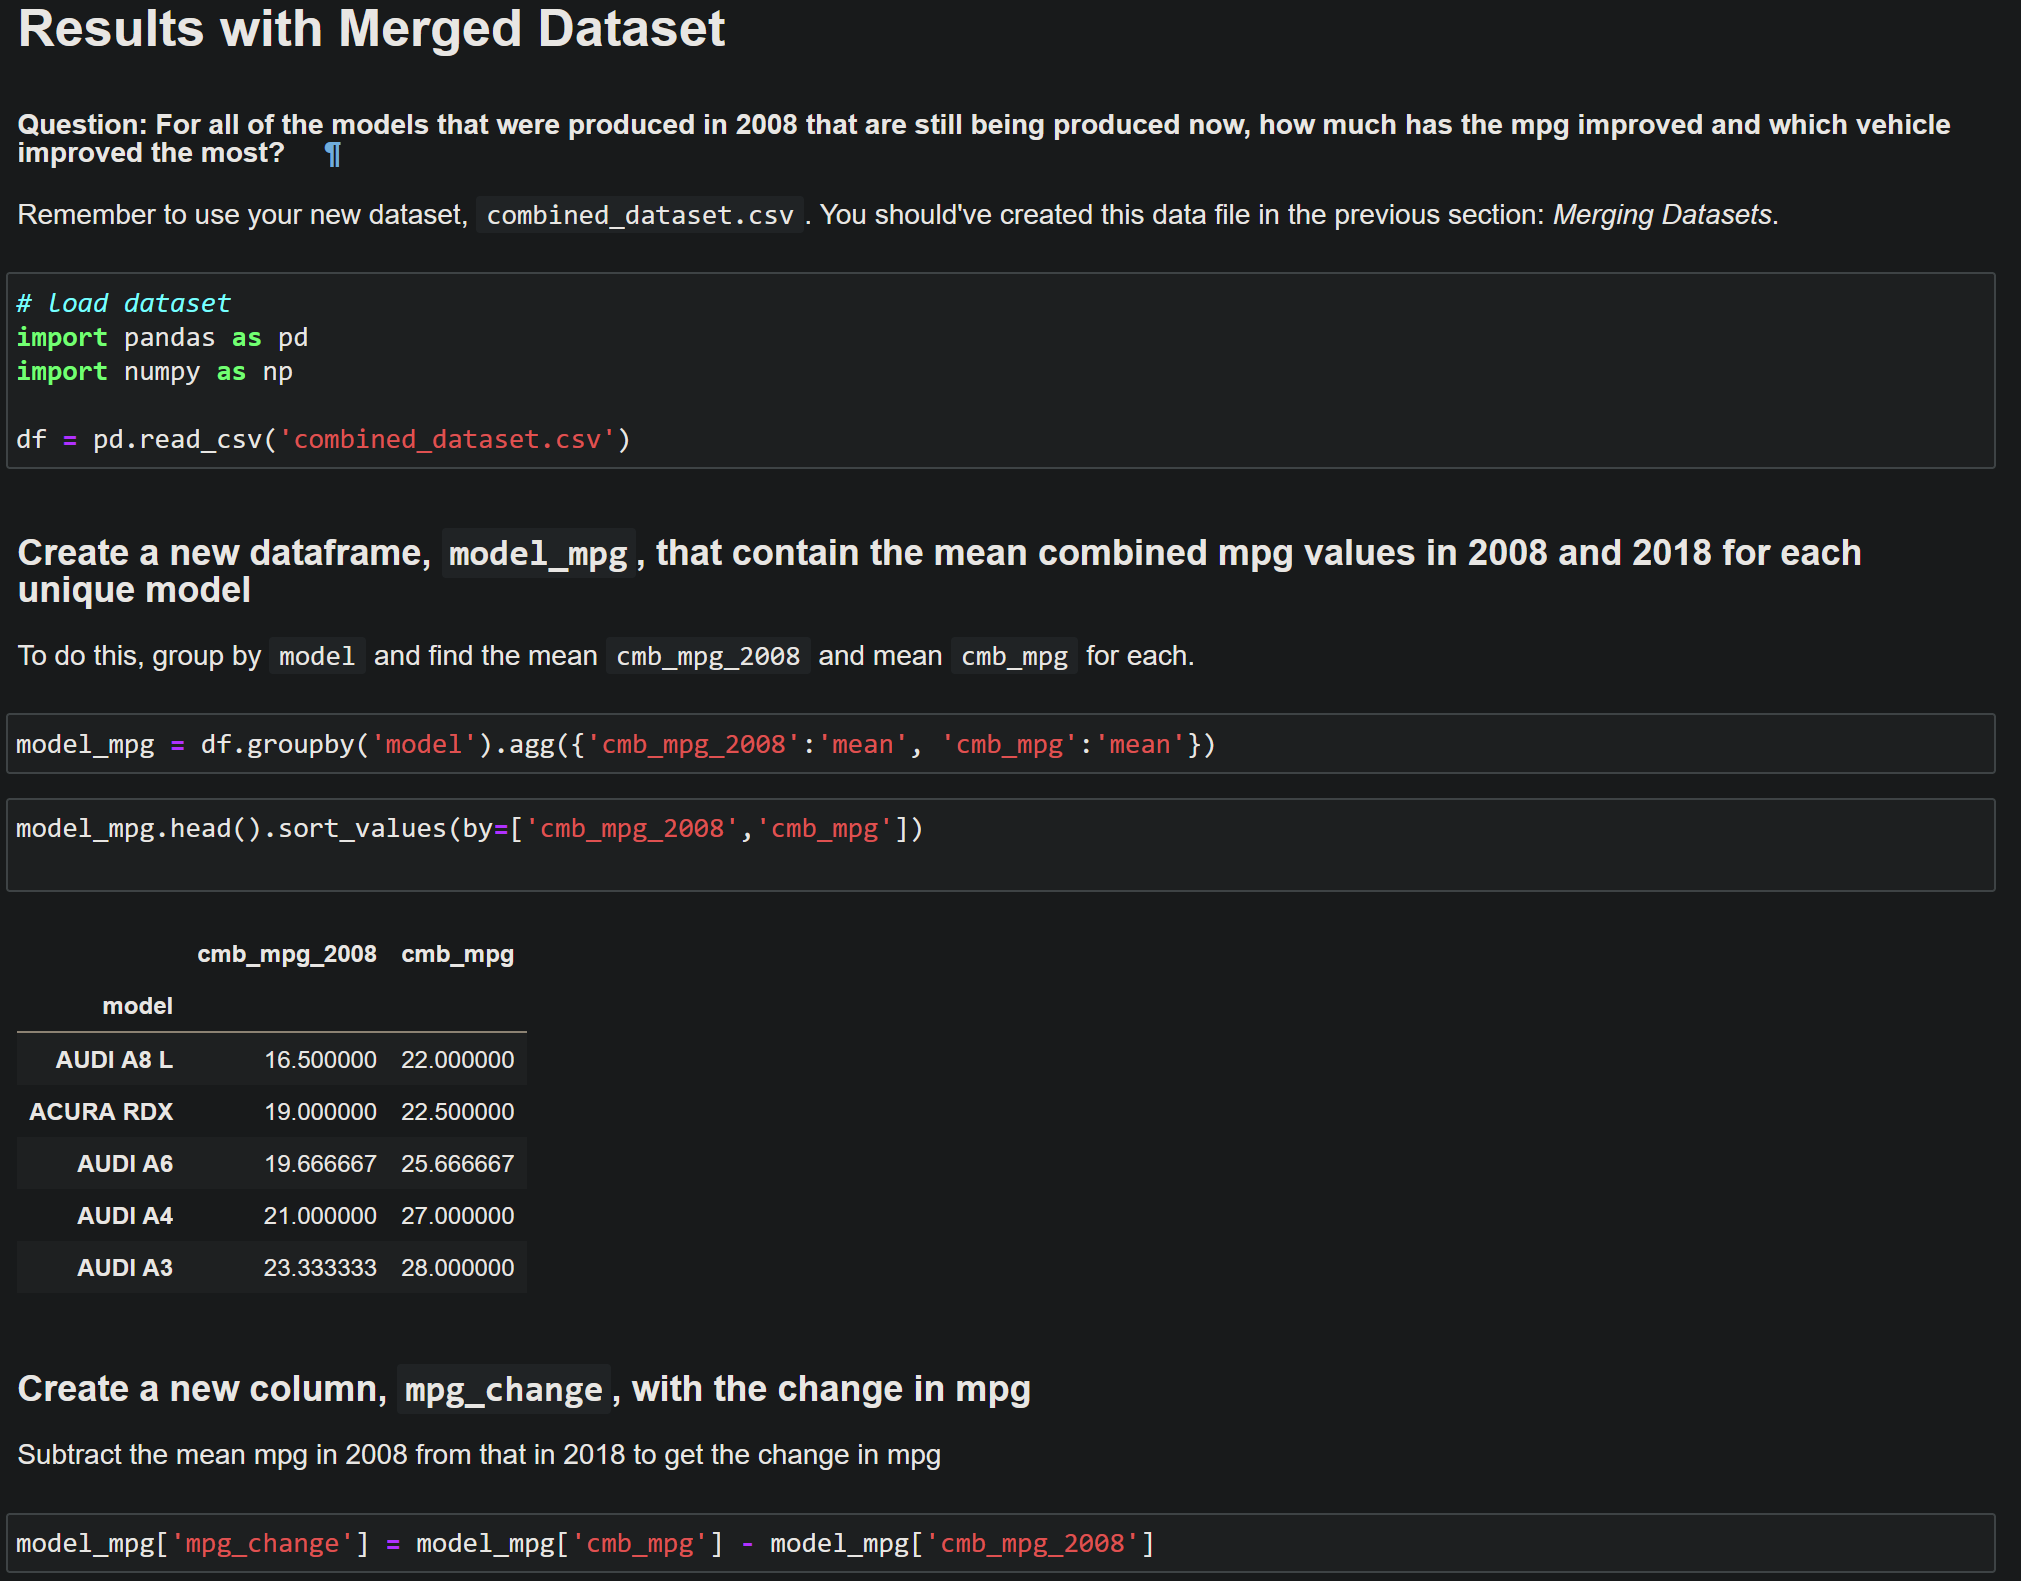

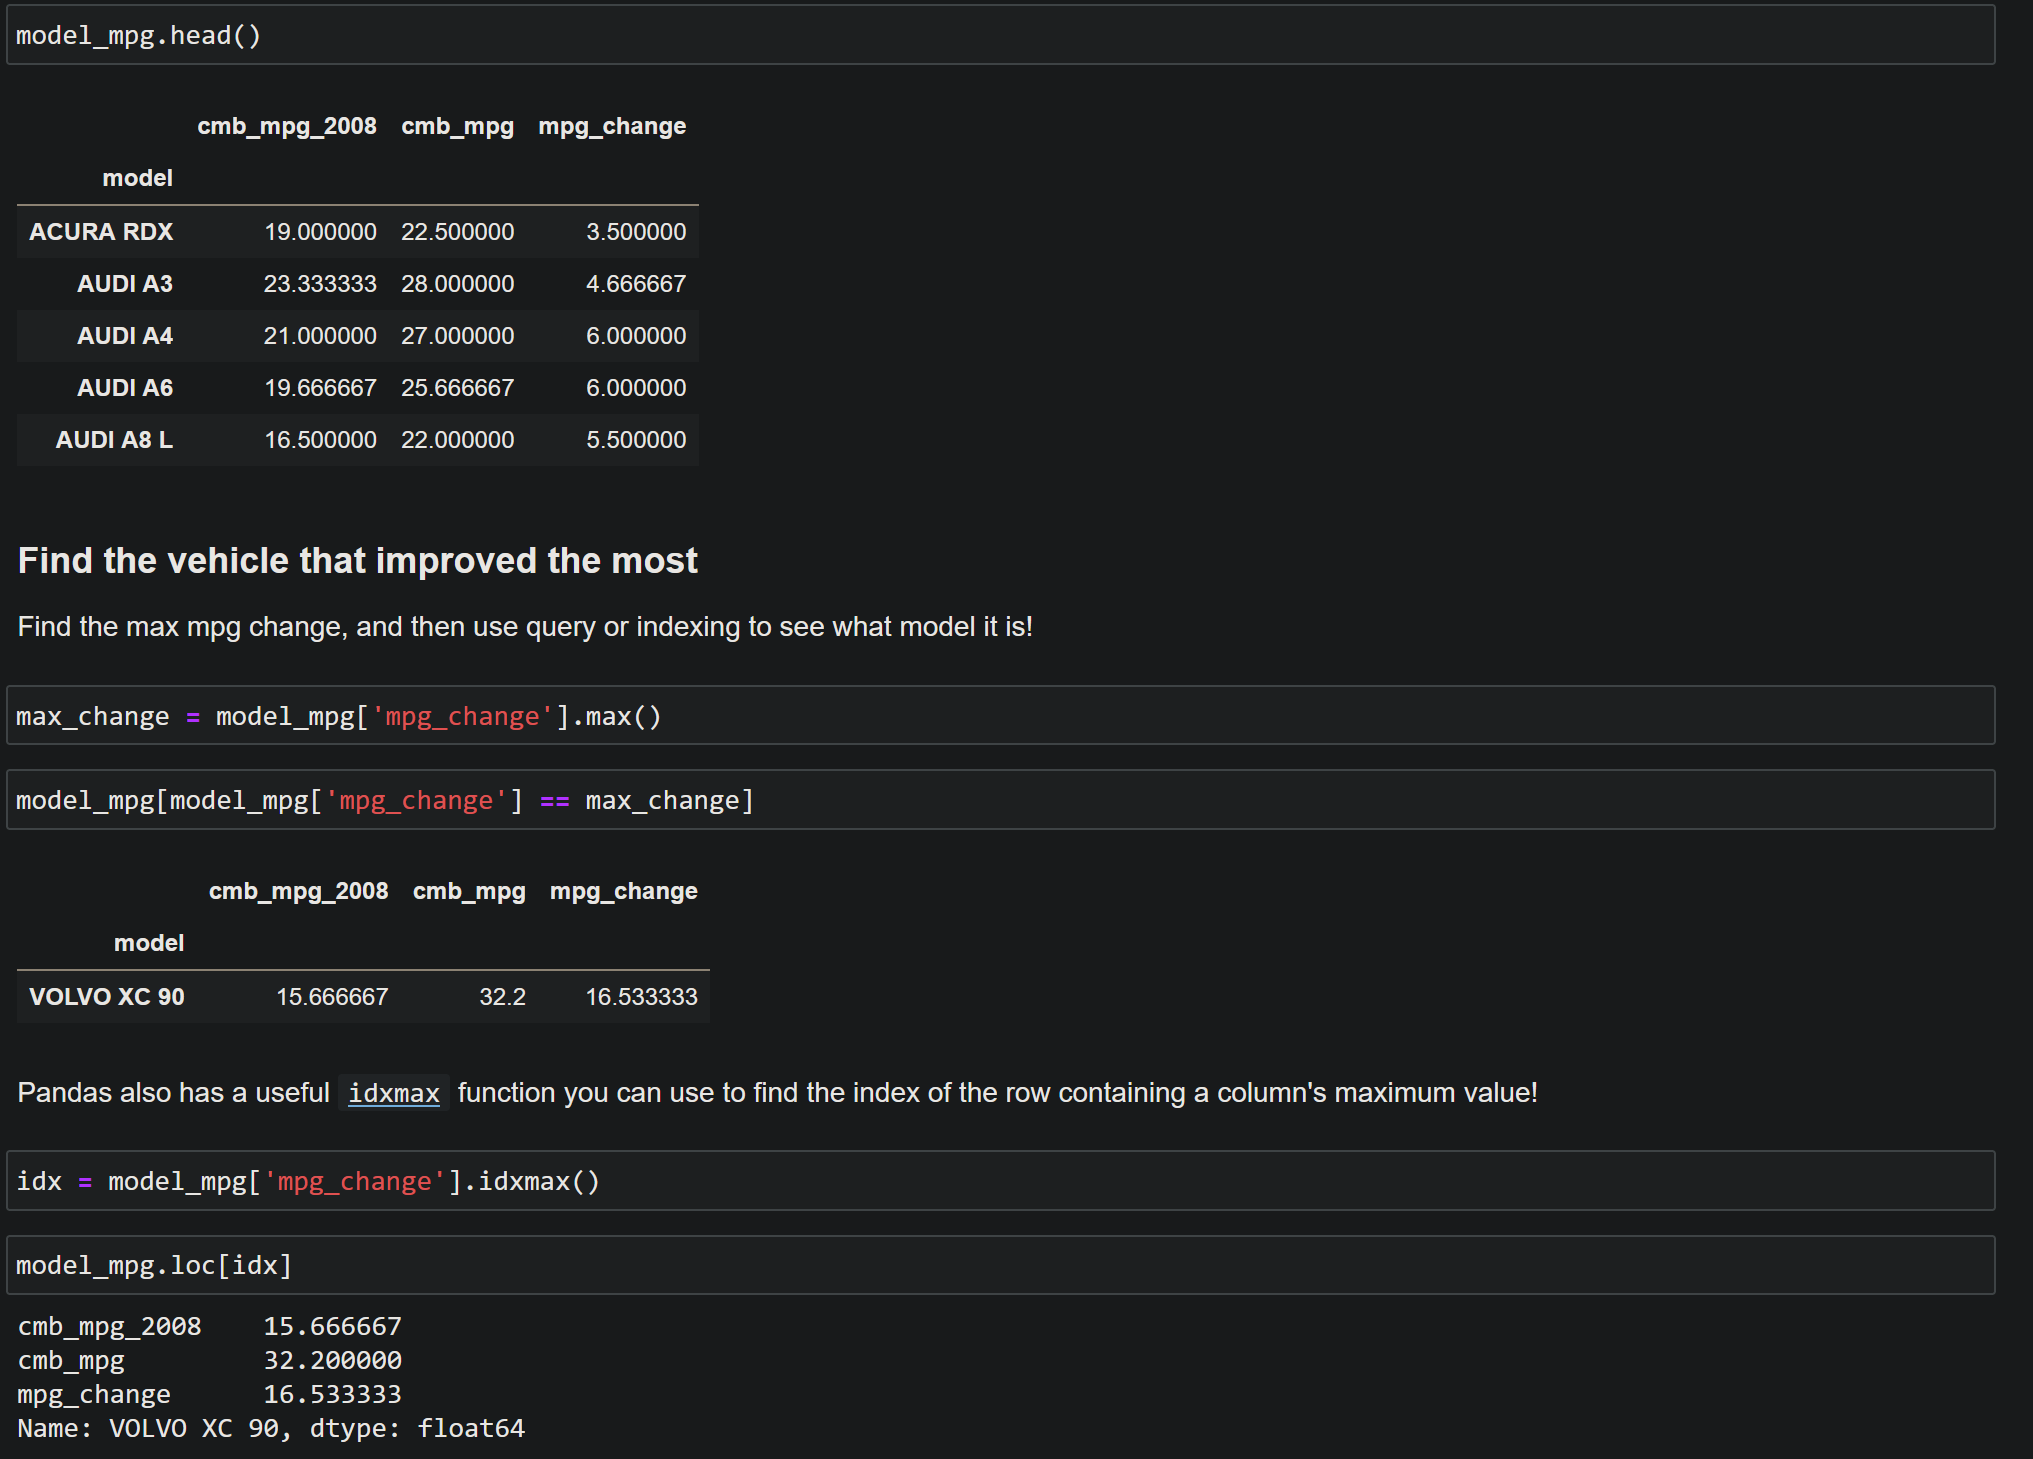

## Neat Notebook Tricks

### `%timeit` - measure performance

`%%timeit` for a whole cell to run

`%timeit` for a single line to run

In [158]:
%%timeit
from math import sqrt

def fibo1(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    return fibo1(n-1) + fibo1(n-2)

def fibo2(n):
    return ((1+sqrt(5))**n-(1-sqrt(5))**n)/(2**n*sqrt(5))   

537 ns ± 3.76 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [159]:
%timeit fibo1(20)

NameError: name 'fibo1' is not defined

In [160]:
%timeit fibo2(20)

NameError: name 'fibo2' is not defined

### `%pdb` - Debugging in the notebook

Interactive debugger using `%pdb` that lets you inspect vars in the current namespace in the current namespace. 

Makes it convenient for screw-ups like me who would end up making a bunch of `print()` statements.

In **vscode**, the debugger will pop-up towards the top by the searchbar/command palette area.

[Documentation here](https://docs.python.org/3/library/pdb.html)

In [ ]:
%pdb

Automatic pdb calling has been turned ON


In [ ]:
ex = "debug me"
breakTheThing = 1/0

ZeroDivisionError: division by zero

> c:\users\ethan\appdata\local\temp\ipykernel_14524\3195429164.py(2)<module>()

'debug me'
*** NameError: name 'breakThething' is not defined
*** NameError: name 'breakTheThing' is not defined


In [ ]:
%pdb

Automatic pdb calling has been turned OFF


### Converting to new formats (and command execution, apparently)

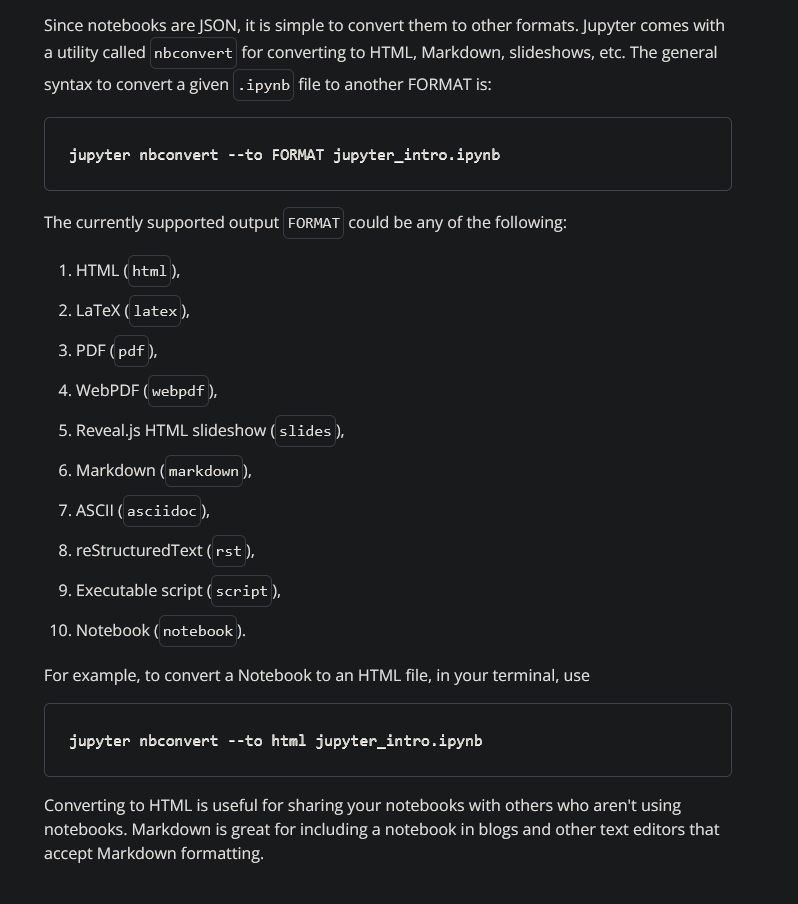

In [ ]:
!jupyter nbconvert --to html scratchpap-but-jupyter.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.


In [ ]:
# wild that you can just run commands in here

!ping 127.0.0.1  


Pinging 127.0.0.1 with 32 bytes of data:
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128

Ping statistics for 127.0.0.1:
    Packets: Sent = 4, Received = 4, Lost = 0 (0% loss),
Approximate round trip times in milli-seconds:
    Minimum = 0ms, Maximum = 0ms, Average = 0ms
